<a href="https://colab.research.google.com/github/jmlira2002/Extracci-n-de-caracter-sticas/blob/main/Actividad_5_(Extracci%C3%B3n_de_Caracter%C3%ADsticas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# José María Martínez Lira - A01707738

In [ ]:
%pip install funpymodeling
%pip install --upgrade numpy

In [ ]:
#Importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

## Agregar el archivo: microretailer_mit_lift_lab.xlsx

In [ ]:
#Cargamos  df y mostramos los primeros 5 registros
df = pd.read_excel('/content/microretailer_mit_lift_lab.xlsx')
df.head()

,_record_id,_title,_server_updated_at,_updated_by,_geometry,_latitude,_longitude,228_store_name,229_store_picture,232_type_of_store,...,261_technology_organization,262_technology_serve_customers,263_technology_secure_sales,264_technology_budget,267_technology_investment_customer_preferences,234_willingness_participate_workshop,318_shopkeeper_name,319_shopkeepers_last_name,236_whatsapp,235_email
0,dff2998e-af74-4de6-8efd-488aca24e67b,"November 12, 2022",2022-11-12 22:15:10 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.233822273 19.0535362706),19.053536,-98.233822,Eugene’s Compostura,1 Photo,Tailor,...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
1,c596412f-4fc2-4983-acba-d9565859e42f,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2341421351 19.0535610353),19.053561,-98.234142,Frutas y verduras Angy,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
2,5bb632b3-41b5-4fb6-a817-b564e8b45a48,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.232299887 19.058654656),19.058655,-98.232300,Libélula,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
3,6774a0f6-bab4-4a58-bf94-95ad0b7cb438,"November 12, 2022",2022-11-12 22:15:09 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2331576513 19.0592929035),19.059293,-98.233158,Quality fix,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN
4,6cc637fa-3d54-48c7-9499-6de13d0a26aa,"November 12, 2022",2022-11-12 22:15:08 UTC,Salomon Abdala Perez,SRID=4326;POINT(-98.2338639604 19.0595846029),19.059585,-98.233864,Artesanías Los Pinos,1 Photo,Grocery store (aka. nanostore),...,NaN,NaN,NaN,NaN,NaN,no,NaN,NaN,NaN,NaN


## Aplicar métodos para reemplazar valores nulos del dataframe

In [ ]:
#Encontramos un total de 171 registros y 106 columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Columns: 106 entries, _record_id to 235_email
dtypes: float64(23), int64(2), object(81)
memory usage: 141.7+ KB


In [ ]:
#Vemos los nulos existentes por cada columna
print(df.isnull().sum().to_string())

_record_id                                                      0
_title                                                          0
_server_updated_at                                              0
_updated_by                                                     0
_geometry                                                       0
_latitude                                                       0
_longitude                                                      0
228_store_name                                                  0
229_store_picture                                               0
232_type_of_store                                               0
108_does_the_micro_retailer_has_a_barred_window_                0
99_does_the_micro_retailer_exhibits_products_outside_           0
102_does_the_micro_retailer_sells_fresh_products_               0
97_number_of_customers_in_store                                 0
268_number_fridges                                              3
184_store_

In [ ]:
# Eliminamos aquellas columnas que tengan mas del 60%
#de datos faltantes.
columnas= df.columns[df.isnull().sum() > 99]
df = df.drop(columnas, axis=1)

In [ ]:
#Volvemos a analizar los nulos por columna
df.isnull().sum()

_record_id                                                     0
_title                                                         0
_server_updated_at                                             0
_updated_by                                                    0
_geometry                                                      0
_latitude                                                      0
_longitude                                                     0
228_store_name                                                 0
229_store_picture                                              0
232_type_of_store                                              0
108_does_the_micro_retailer_has_a_barred_window_               0
99_does_the_micro_retailer_exhibits_products_outside_          0
102_does_the_micro_retailer_sells_fresh_products_              0
97_number_of_customers_in_store                                0
268_number_fridges                                             3
184_store_devices        

In [ ]:
#Verificamos el tipo de dato por columna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 53 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   _record_id                                                  171 non-null    object 
 1   _title                                                      171 non-null    object 
 2   _server_updated_at                                          171 non-null    object 
 3   _updated_by                                                 171 non-null    object 
 4   _geometry                                                   171 non-null    object 
 5   _latitude                                                   171 non-null    float64
 6   _longitude                                                  171 non-null    float64
 7   228_store_name                                              171 non-null    object 
 8   

In [ ]:
#Imputamos datos faltantes con el promedio
Columnas = ['268_number_fridges', '2_current_permanent_employees', '4_number_permanent_employees_last_year', '145_number_direct_competitors', '172_supplier_frequency', '163_number_high_perishable_products']
df[Columnas]= df[Columnas].fillna(round(df[Columnas].mean(),1))

In [ ]:
#Colocamos una fecha ficticia en las columna para los datos faltantes
columnas = ['233_date_establishment']
df[columnas] = df[columnas].fillna("1900-01-01")

In [ ]:
df['5_change_store_space_last_year'].value_counts()

5_change_store_space_last_year
No cambió              72
Disminuyó 15%           9
Aumentó 25%             7
Aumentó 15%             4
Aumentó 50% o más       4
Disminuyó 25%           2
Disminuyó 50% o más     1
Name: count, dtype: int64

In [ ]:
df['6_change_employees_average_salary_last_year'].value_counts()

6_change_employees_average_salary_last_year
No cambió                50
Aumentó 15%              14
Disminuyó 15%             5
Aumentó 25%               4
Aumentó 50% o más         4
Disminuyó 25%             3
Dependiente               1
Disminuyó 50% o más       1
0                         1
No hay empleándosela      1
40                        1
Name: count, dtype: int64

In [ ]:
#Rellenamos los datos faltantes con la moda
columnas = ['5_change_store_space_last_year', '6_change_employees_average_salary_last_year']
df[columnas] = df[columnas].fillna('No cambió')

In [ ]:
df['20_reviews_finances_monthly'].value_counts()

20_reviews_finances_monthly
yes    79
no     29
Name: count, dtype: int64

In [ ]:
df['19_tax_id'].value_counts()

19_tax_id
yes    70
no     30
Name: count, dtype: int64

In [ ]:
df['186_internet_connection'].value_counts()

186_internet_connection
yes    76
no     32
Name: count, dtype: int64

In [ ]:
#Rellenamos los datos faltantes con la moda
columnas = ['20_reviews_finances_monthly', '19_tax_id', '186_internet_connection']
df[columnas] = df[columnas].fillna('yes')

In [ ]:
df['310_burnout'].value_counts()

310_burnout
no     68
yes    39
Name: count, dtype: int64

In [ ]:
df['33_credit_to_customers'].value_counts()

33_credit_to_customers
no     80
yes    27
Name: count, dtype: int64

In [ ]:
df['227_agreement_ecommerce_platforms'].value_counts()

227_agreement_ecommerce_platforms
no     88
yes    10
Name: count, dtype: int64

In [ ]:
df['56_procurement_changes_pandemic'].value_counts()

56_procurement_changes_pandemic
no     55
yes    26
Name: count, dtype: int64

In [ ]:
df['234_willingness_participate_workshop'].value_counts()

234_willingness_participate_workshop
no     49
yes    49
Name: count, dtype: int64

In [ ]:
#Rellenamos los datos faltantes con la moda
columnas = ['310_burnout', '33_credit_to_customers', '227_agreement_ecommerce_platforms', '56_procurement_changes_pandemic', '234_willingness_participate_workshop']
df[columnas] = df[columnas].fillna('no')

In [ ]:
df['42_willingness_share_inventory_data_suppliers'].value_counts()

42_willingness_share_inventory_data_suppliers
Totalmente en desacuerdo          49
Algo de acuerdo                   13
Algo en desacuerdo                 8
Ni de acuerdo ni en desacuerdo     6
Totalmente de acuerdo              4
Name: count, dtype: int64

In [ ]:
df['44_willingness_inventory_management_suppliers'].value_counts()

44_willingness_inventory_management_suppliers
Totalmente en desacuerdo          58
Algo en desacuerdo                 8
Ni de acuerdo ni en desacuerdo     5
Algo de acuerdo                    5
Totalmente de acuerdo              3
Name: count, dtype: int64

In [ ]:
df['45_willingness_reorder_suppliers'].value_counts()

45_willingness_reorder_suppliers
Totalmente en desacuerdo          40
Algo de acuerdo                   12
Algo en desacuerdo                10
Totalmente de acuerdo              9
Ni de acuerdo ni en desacuerdo     6
Name: count, dtype: int64

In [ ]:
df['46_willingness_reorder_suppliers_variety'].value_counts()

46_willingness_reorder_suppliers_variety
Totalmente en desacuerdo          33
Totalmente de acuerdo             15
Algo de acuerdo                   14
Algo en desacuerdo                 7
Ni de acuerdo ni en desacuerdo     5
Name: count, dtype: int64

In [ ]:
#Rellenamos los datos faltantes con la moda
columnas = ['42_willingness_share_inventory_data_suppliers', '44_willingness_inventory_management_suppliers', '45_willingness_reorder_suppliers', '46_willingness_reorder_suppliers_variety']
df[columnas] = df[columnas].fillna('Totalmente en desacuerdo')

In [ ]:
df['249_technology_training'].value_counts()

249_technology_training
Totalmente de acuerdo             37
De acuerdo                        21
Totalmente en desacuerdo           8
Ni de acuerdo ni en desacuerdo     6
En desacuerdo                      1
Name: count, dtype: int64

In [ ]:
df['250_technology_investment_operations'].value_counts()

250_technology_investment_operations
Totalmente de acuerdo             34
De acuerdo                        20
Totalmente en desacuerdo           8
En desacuerdo                      6
Ni de acuerdo ni en desacuerdo     6
Name: count, dtype: int64

In [ ]:
df['251_technology_investment_customers'].value_counts()

251_technology_investment_customers
Totalmente de acuerdo             35
De acuerdo                        23
Totalmente en desacuerdo           7
Ni de acuerdo ni en desacuerdo     5
En desacuerdo                      3
Name: count, dtype: int64

In [ ]:
#Rellenamos los datos faltantes con la moda
columnas = ['249_technology_training', '250_technology_investment_operations', '251_technology_investment_customers']
df[columnas] = df[columnas].fillna('Totalmente de acuerdo')

In [ ]:
df['49_inventory_records'].value_counts()

49_inventory_records
En papel                                             40
Software especializado + computadora                 21
En Excel                                             20
No lo hago                                           18
En Excel,En papel                                     7
Mentalmente                                           1
Aplicación móvil (i.e. App) + smartphone              1
En papel,Mental                                       1
Aplicación móvil (i.e. App) + smartphone,En Excel     1
Name: count, dtype: int64

In [ ]:
df['18_sales_records'].value_counts()

18_sales_records
En papel                                                                                                     47
Software especializado + computadora                                                                         22
No lo hago                                                                                                   14
En Excel                                                                                                     10
Caja registradora (análoga)                                                                                   4
En Excel,En papel                                                                                             4
Aplicación móvil (i.e. App) + smartphone                                                                      1
Aplicación móvil (i.e. App) + smartphone,Caja registradora (análoga)                                          1
Contadora                                                                              

In [ ]:
#Rellenamos los datos faltantes con la moda
columnas = ['49_inventory_records', '18_sales_records']
df[columnas] = df[columnas].fillna('En papel')

In [ ]:
df['193_sales_planning_tools'].value_counts()

193_sales_planning_tools
Ninguna                                    33
Cuaderno                                   21
Software especializado                      6
Excel                                       6
Cuaderno,Excel                              3
Cuaderno,Ninguna                            2
Other                                       1
Mental                                      1
Por temporada de pan                        1
Sobre demanda                               1
Aplicación móvil,Software especializado     1
Excel,Software especializado                1
Catálogo                                    1
Redes sociales                              1
Aplicación móvil                            1
En físico                                   1
Aplicación móvil,Excel                      1
Name: count, dtype: int64

In [ ]:
#Rellenamos los datos faltantes con la moda
columnas = ['193_sales_planning_tools']
df[columnas] = df[columnas].fillna('Ninguna')

In [ ]:
df['214_customer_relationship_tools'].value_counts()

214_customer_relationship_tools
Redes sociales                     27
Aplicación móvil                   21
Ninguna                            20
Aplicación móvil,Redes sociales    13
Cuaderno                            6
Teléfono                            1
Cuaderno,Redes sociales             1
Aplicación móvil,De frente          1
Físico                              1
Aplicación móvil,Ninguna            1
publicidades                        1
Publicidad                          1
Teléfono celular                    1
Name: count, dtype: int64

In [ ]:
#Rellenamos los datos faltantes con la moda
columnas = ['214_customer_relationship_tools']
df[columnas] = df[columnas].fillna('Redes sociales')

In [ ]:
df['210_sales_channels'].value_counts()

210_sales_channels
Redes sociales (e.g. Facebook, Instagram)                                                                                                11
WhatsApp                                                                                                                                 10
Redes sociales (e.g. Facebook, Instagram),WhatsApp                                                                                        9
Llamada a Teléfono fijo                                                                                                                   6
Llamada a Teléfono celular,WhatsApp                                                                                                       6
Llamada a Teléfono celular                                                                                                                5
Llamada a Teléfono celular,Redes sociales (e.g. Facebook, Instagram),WhatsApp                                                             5
L

In [ ]:
#Rellenamos los datos faltantes con la moda
columnas = ['210_sales_channels']
df[columnas] = df[columnas].fillna('Redes sociales (e.g. Facebook, Instagram)')

In [ ]:
df['189_payment_methods'].value_counts()

189_payment_methods
Efectivo                                                                                                                                 40
Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria                                                                       30
Efectivo,Tarjeta de débito y/o crédito                                                                                                   19
Efectivo,Transferencia interbancaria                                                                                                     15
Aplicación móvil (e.g. CODI),Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria                                           1
Aplicación móvil (e.g. CODI),Efectivo,Tarjeta de débito y/o crédito,Transferencia interbancaria,Trueque (e.g. comercio o intercambio)     1
Tarjeta de débito y/o crédito                                                                                                             1


In [ ]:
#Rellenamos los datos faltantes con la moda
columnas = ['189_payment_methods']
df[columnas] = df[columnas].fillna('Efectivo')

In [ ]:
df['60_services'].value_counts()

60_services
Ninguno                                                                                                                                         44
Entrega a domicilio                                                                                                                             15
Recarga telefónica                                                                                                                               7
Entrega a domicilio,Pago de servicios públicos (e.g. Yastas),Recarga telefónica                                                                  2
Entrega a domicilio,Recarga telefónica                                                                                                           2
Toma de papa nicolau                                                                                                                             1
Renta de local                                                                                            

In [ ]:
#Rellenamos los datos faltantes con la moda
columnas = ['60_services']
df[columnas] = df[columnas].fillna('Ninguno')

In [ ]:
df['157_frequency_organize_shelves'].value_counts()

157_frequency_organize_shelves
Semanalmente      40
Diariamente       32
Nunca              8
Mensualmente       7
Quincenalmente     5
Anualmente         2
Semestralmente     1
No se tiene        1
Name: count, dtype: int64

In [ ]:
#Rellenamos los datos faltantes con la moda
columnas = ['157_frequency_organize_shelves']
df[columnas] = df[columnas].fillna('Semanalmente')

In [ ]:
df['158_charact_organize_products_on_shelves'].value_counts()

158_charact_organize_products_on_shelves
Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.)                                                                       29
Frecuencia de venta                                                                                                                        15
Tamaño                                                                                                                                      9
Margen de utilidad                                                                                                                          8
Precio                                                                                                                                      6
Refrigeración                                                                                                                               4
Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.),Refrigeración                         

In [ ]:
#Rellenamos los datos faltantes con la moda
columnas = ['158_charact_organize_products_on_shelves']
df[columnas] = df[columnas].fillna('Categoría (e.g. limpieza, aseo personal, comestibles, lácteos, etc.)')

In [ ]:
df['161_actions_stockouts'].value_counts()

161_actions_stockouts
Solicitar tiempo al cliente para conseguir el producto                                                                               31
Ofrecer un producto sustituto                                                                                                        20
Ofrecer un producto sustituto,Solicitar tiempo al cliente para conseguir el producto                                                 12
Perder la venta                                                                                                                       8
Informar al proveedor,Solicitar tiempo al cliente para conseguir el producto                                                          5
Informar al proveedor                                                                                                                 5
Informar al proveedor,Ofrecer un producto sustituto                                                                                   3
Informar al proveedor,Ofre

In [ ]:
#Rellenamos los datos faltantes con la moda
columnas = ['161_actions_stockouts']
df[columnas] = df[columnas].fillna('Solicitar tiempo al cliente para conseguir el producto')

In [ ]:
df['162_inventory_extra_space'].value_counts()

162_inventory_extra_space
0        29
20%      20
10%      17
30%      10
50% +     9
40%       3
2%        1
Name: count, dtype: int64

In [ ]:
#Rellenamos los datos faltantes con la moda
columnas = ['162_inventory_extra_space']
df[columnas] = df[columnas].fillna('0')

In [ ]:
#Revisamos que no queden valores nulos en el df
df.isnull().sum().sum()

2

## Aplicar métodos (Desviación Estándar o Rango Intercuartílico) para eliminar Outliers del dataframe

<Figure size 3000x5000 with 0 Axes>

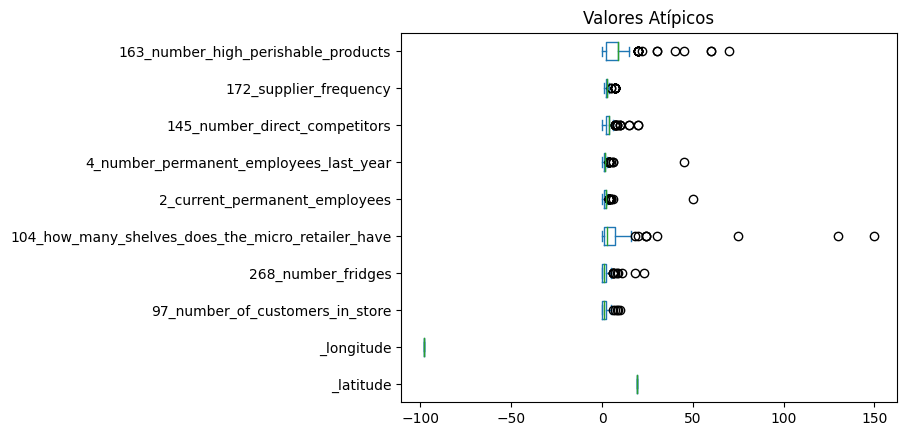

In [ ]:
#Realizamos diagrama de caja del df
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(30, 50))
df.plot(kind='box', vert=False)
plt.title("Valores Atípicos")
plt.show()

In [ ]:
#Seleccionamos solo las columnas númericas del df
datos_numericos = df.select_dtypes(include=['number'])

#Definimos los limites con desviación estándar
y=datos_numericos
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()

#Eliminamos los outliers
y= y[(y<=Limite_Superior)&(y>=Limite_Inferior)]
y.isnull().sum()

_latitude                                            0
_longitude                                           0
97_number_of_customers_in_store                      4
268_number_fridges                                   3
104_how_many_shelves_does_the_micro_retailer_have    3
2_current_permanent_employees                        1
4_number_permanent_employees_last_year               1
145_number_direct_competitors                        4
172_supplier_frequency                               0
163_number_high_perishable_products                  5
dtype: int64

In [ ]:
#Sustiyuimos outliers con el promedio
y=y.fillna(round(y.mean(),1))
#Revisamos que se hayan imputado bien los outliers
y.isnull().sum().sum()

0

In [ ]:
#Desplegamos las medidas estadísticas del df antes de hacer el cambio de las númericas
df.describe()

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,145_number_direct_competitors,172_supplier_frequency,163_number_high_perishable_products
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,19.045305,-98.218969,1.391813,1.636257,6.707602,2.076023,1.902924,3.774269,2.988304,8.618713
std,0.021956,0.042889,1.733321,2.839693,16.368438,3.861280,3.494659,2.866651,1.530045,10.004123
min,18.999309,-98.314273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,19.020820,-98.250742,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000
50%,19.043188,-98.217874,1.000000,1.000000,3.000000,2.100000,1.900000,3.800000,3.000000,8.600000
75%,19.068002,-98.180573,2.000000,2.000000,7.000000,2.100000,1.900000,3.900000,3.000000,8.600000
max,19.075273,-98.163314,10.000000,23.000000,150.000000,50.000000,45.000000,20.000000,7.000000,70.000000


In [ ]:
#Cambiamos las columnas númericas del df por las que se han dado tratamiento
# a los outliers
for columna in y.columns:
    df[columna] = y[columna]
# volvemos a obtener las medidas estadísticas para verificar que se hayan
# hecho los cambios en el df
df.describe()

#Se puede observar la diferencia en la columna '97_number_of_customers_in_store'
#debido a que era una de las que contenia los nulos

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,145_number_direct_competitors,172_supplier_frequency,163_number_high_perishable_products
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,19.045305,-98.218969,1.221053,1.356725,4.714035,1.794152,1.649123,3.444444,2.988304,7.221053
std,0.021956,0.042889,1.325772,1.791811,5.134821,1.148898,1.105780,1.879271,1.530045,5.601431
min,18.999309,-98.314273,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,19.020820,-98.250742,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000
50%,19.043188,-98.217874,1.000000,1.000000,3.000000,2.000000,1.900000,3.800000,3.000000,8.600000
75%,19.068002,-98.180573,2.000000,2.000000,6.000000,2.100000,1.900000,3.800000,3.000000,8.600000
max,19.075273,-98.163314,6.000000,9.000000,30.000000,6.000000,6.000000,10.000000,7.000000,30.000000


In [ ]:
#Convertimos el df a csv
df.to_csv("microretailer_limpio.csv")
from google.colab import files
files.download("microretailer_limpio.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Extraer características a partir de aplicar un análisis univariado, a diferentes variables categóricas (20). Mostrar los resultados obtenidos ,mediante gráficas y tablas

In [ ]:
#Analisis univariado del df
freq_tbl(df)

                               _record_id  frequency  percentage  \
0    dff2998e-af74-4de6-8efd-488aca24e67b          1    0.005848   
1    53c25f08-1c1b-4c1c-97d5-b45c940735cc          1    0.005848   
2    af5c48b5-a916-47a6-aacc-1128ea1e728e          1    0.005848   
3    4790411b-df1d-44f0-a659-6d99e26ae765          1    0.005848   
4    e70db20a-25db-412b-9a71-7df285c92a3d          1    0.005848   
..                                    ...        ...         ...   
166  75bcc709-90ff-4db7-bb82-293f2f72f3ae          1    0.005848   
167  bd59c8b6-81cb-4698-8cfd-dbab7f01ef21          1    0.005848   
168  94b1c6bc-1fb8-4895-aacc-c2604dc12b93          1    0.005848   
169  d9ff4194-657e-4fb4-b5f4-b7e8b350a646          1    0.005848   
170  bf720ff0-3b7d-47ed-ba49-f5d4bfb7293c          1    0.005848   

     cumulative_perc  
0           0.005848  
1           0.011696  
2           0.017544  
3           0.023392  
4           0.029240  
..               ...  
166         0.976608  

In [ ]:

columnas = ['5_change_store_space_last_year', '6_change_employees_average_salary_last_year', '20_reviews_finances_monthly', '19_tax_id', '186_internet_connection', '310_burnout', '33_credit_to_customers', '227_agreement_ecommerce_platforms', '56_procurement_changes_pandemic', '234_willingness_participate_workshop', '42_willingness_share_inventory_data_suppliers', '44_willingness_inventory_management_suppliers', '45_willingness_reorder_suppliers', '46_willingness_reorder_suppliers_variety', '249_technology_training', '250_technology_investment_operations', '251_technology_investment_customers', '49_inventory_records', '18_sales_records', '193_sales_planning_tools']

# Inicializar un diccionario para almacenar los resultados
resultados = {}
cont=1

for columna in columnas:
    table = freq_tbl(df[columna])
    Filtro = table[table['frequency'] > 1]
    Filtro_index = Filtro.set_index(columna)

    # Almacenamos los resultado en un diccionario
    resultados[f'table_{cont}'] = table
    resultados[f'Filtro_{cont}'] = Filtro
    resultados[f'Filtro_index_{cont}'] = Filtro_index
    cont = cont + 1

In [ ]:
# Ciclo para ver todas las tablas
for i in range(1, 21):
    clave = f'table_{i}'
    print(f'DataFrame {clave}:')
    print(resultados[clave])


DataFrame table_1:
  5_change_store_space_last_year  frequency  percentage  cumulative_perc
0                      No cambió        144    0.842105         0.842105
1                  Disminuyó 15%          9    0.052632         0.894737
2                    Aumentó 25%          7    0.040936         0.935673
3                    Aumentó 15%          4    0.023392         0.959064
4              Aumentó 50% o más          4    0.023392         0.982456
5                  Disminuyó 25%          2    0.011696         0.994152
6            Disminuyó 50% o más          1    0.005848         1.000000
DataFrame table_2:
   6_change_employees_average_salary_last_year  frequency  percentage  \
0                                    No cambió        136    0.795322   
1                                  Aumentó 15%         14    0.081871   
2                                Disminuyó 15%          5    0.029240   
3                                  Aumentó 25%          4    0.023392   
4            

In [ ]:
resultados['Filtro_index_1']

,frequency,percentage,cumulative_perc
5_change_store_space_last_year,,,
No cambió,144,0.842105,0.842105
Disminuyó 15%,9,0.052632,0.894737
Aumentó 25%,7,0.040936,0.935673
Aumentó 15%,4,0.023392,0.959064
Aumentó 50% o más,4,0.023392,0.982456
Disminuyó 25%,2,0.011696,0.994152


5_change_store_space_last_year


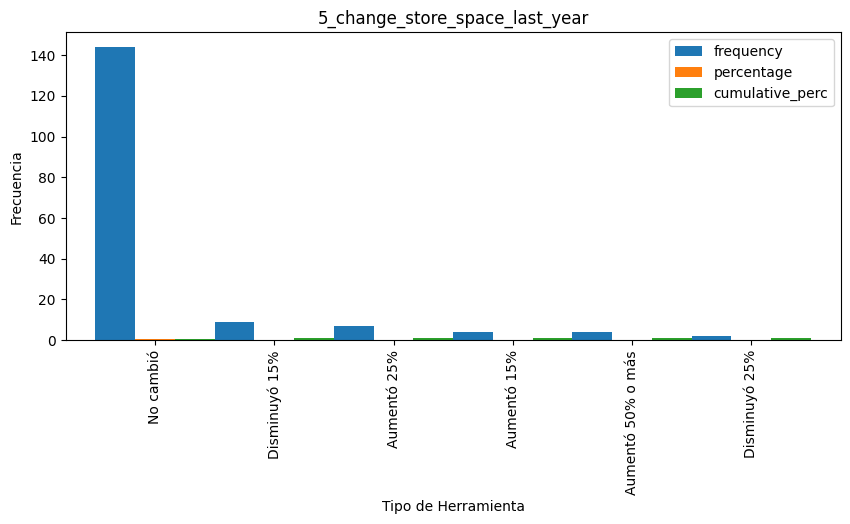

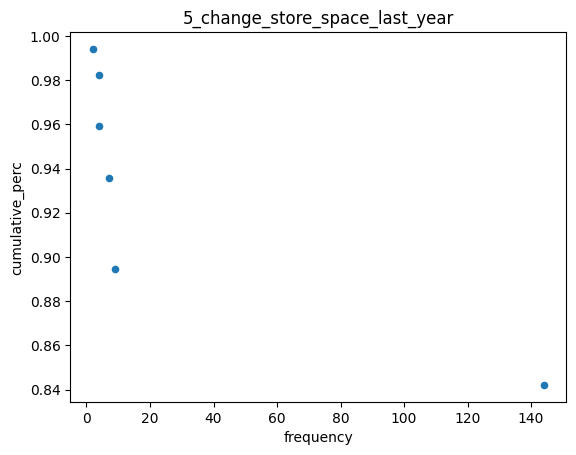

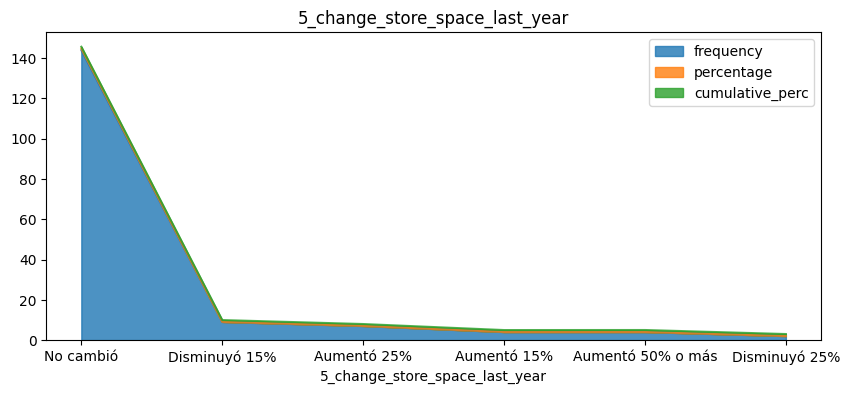

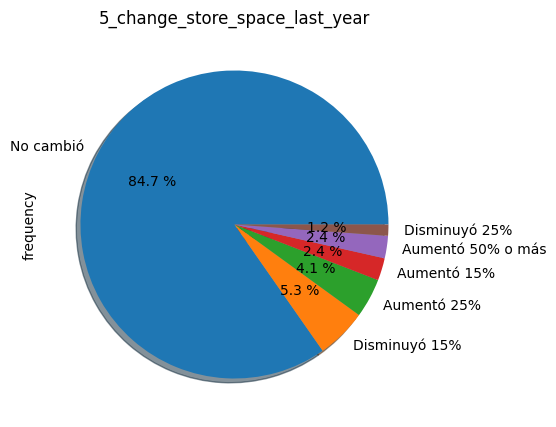





6_change_employees_average_salary_last_year


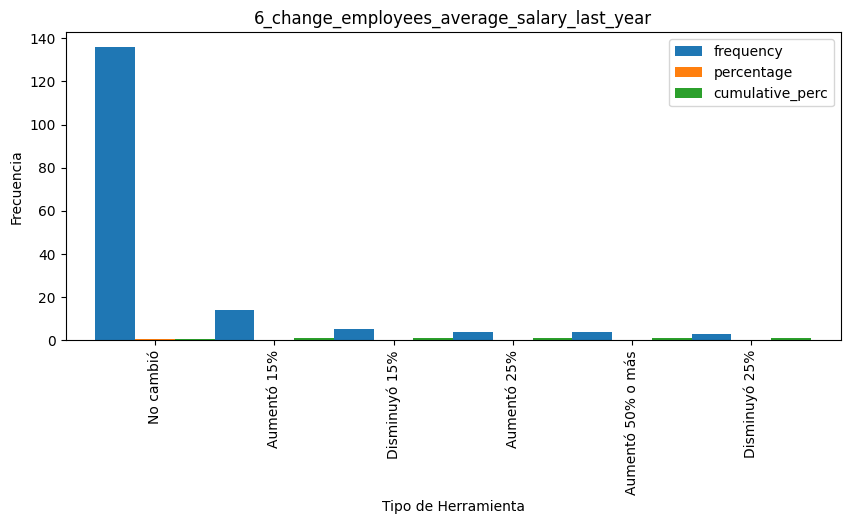

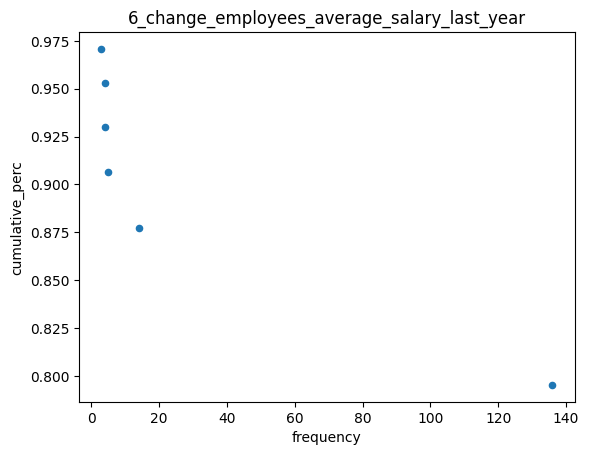

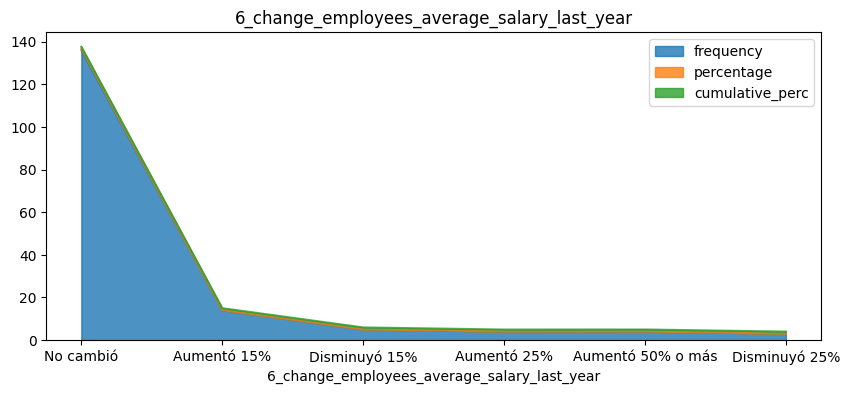

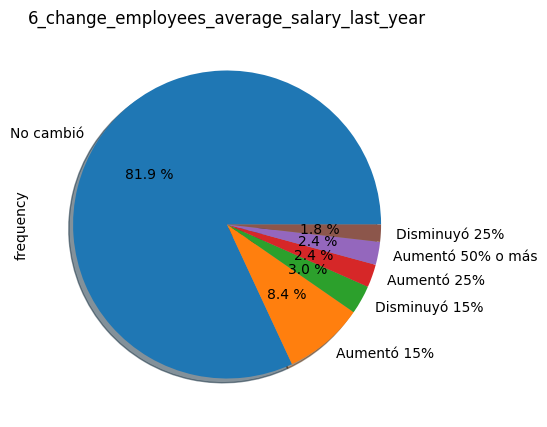





20_reviews_finances_monthly


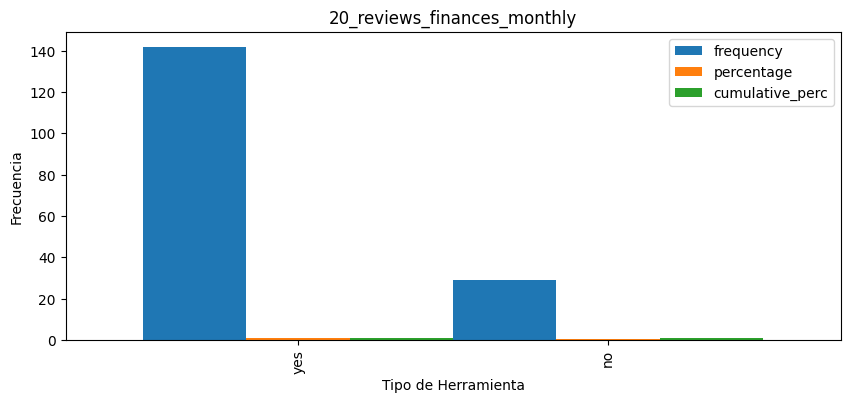

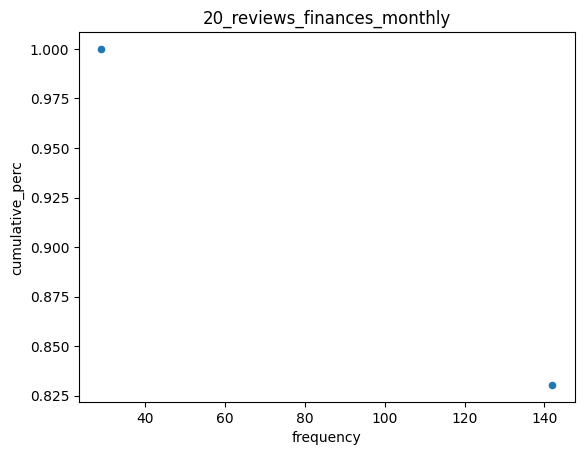

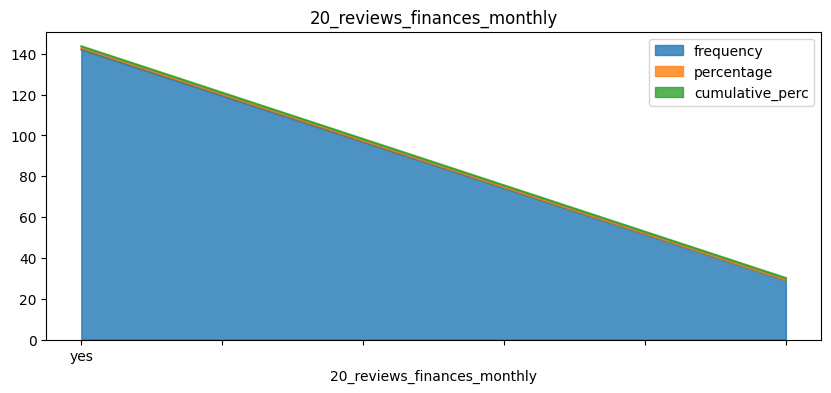

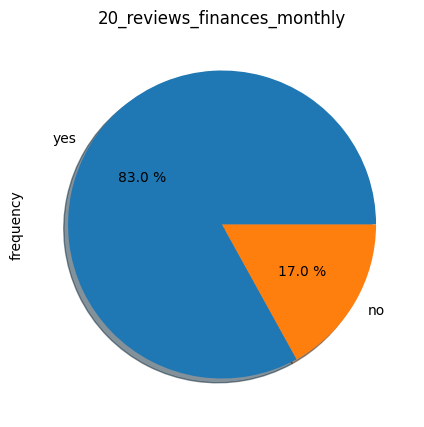





19_tax_id


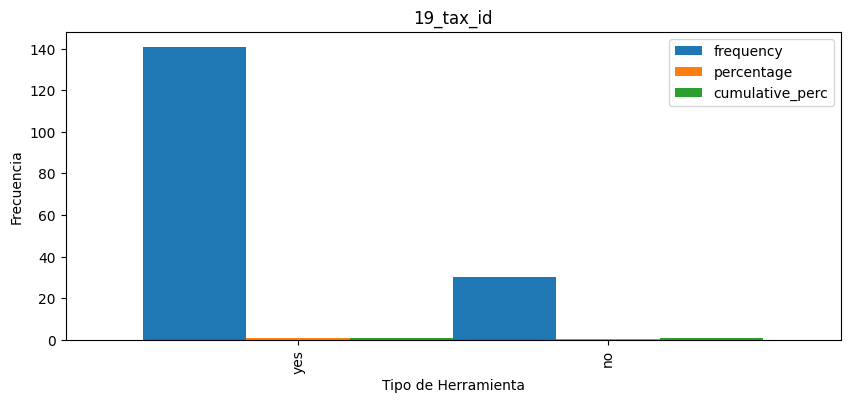

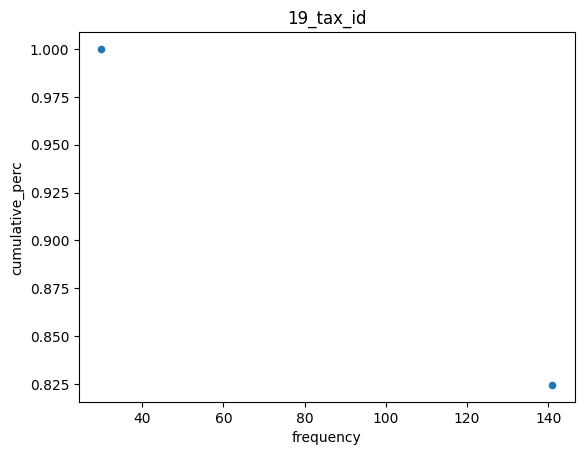

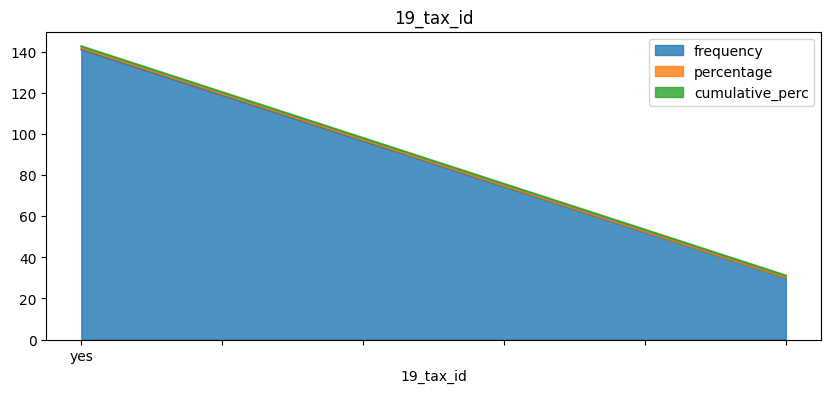

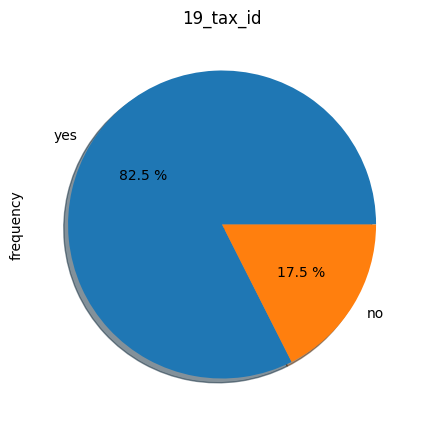





186_internet_connection


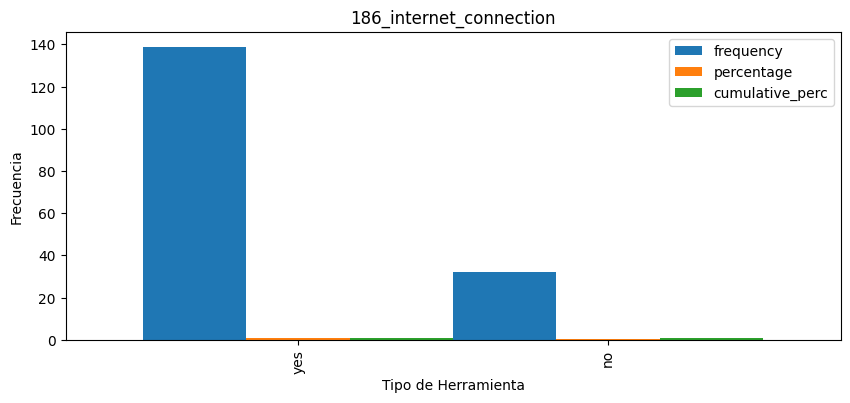

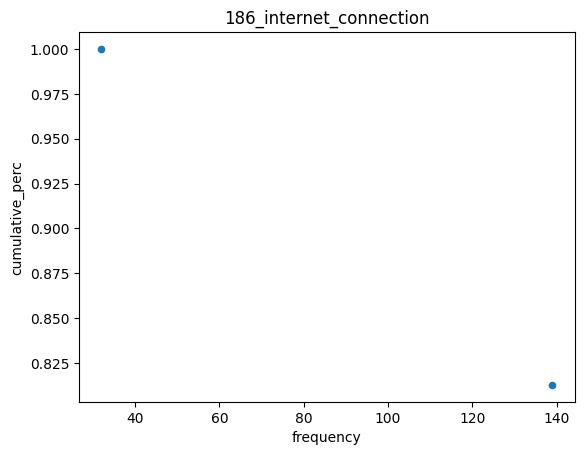

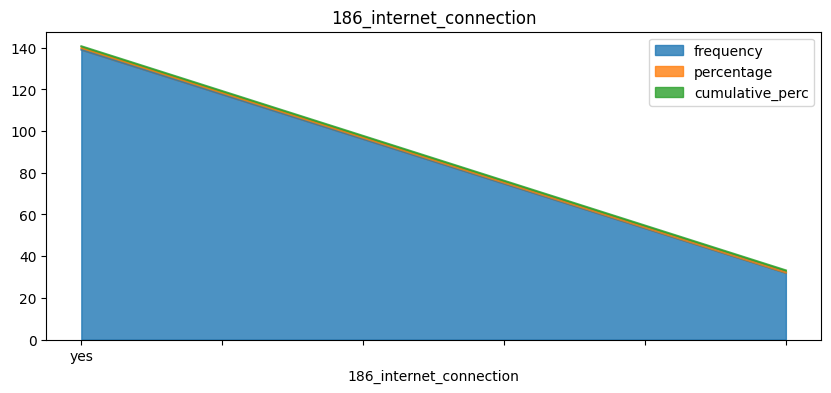

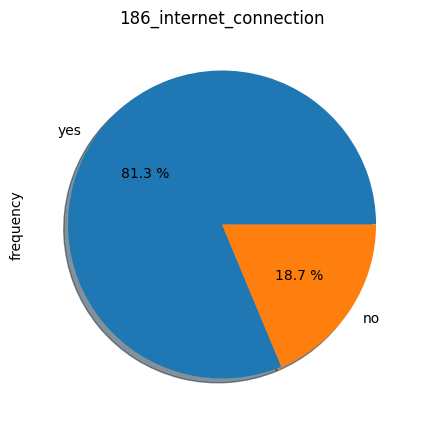





310_burnout


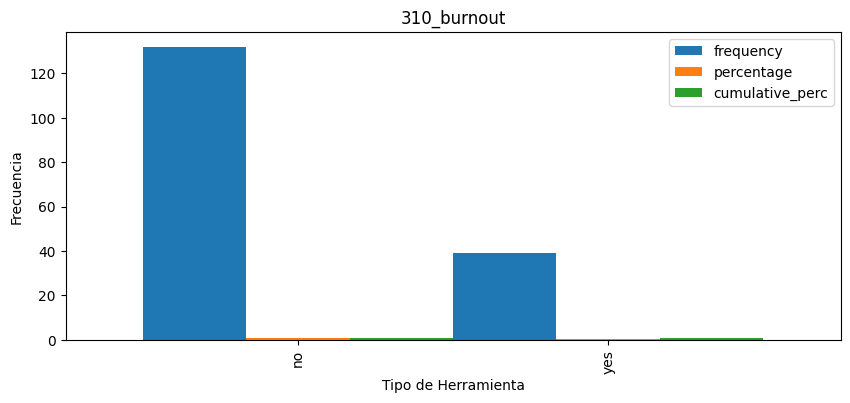

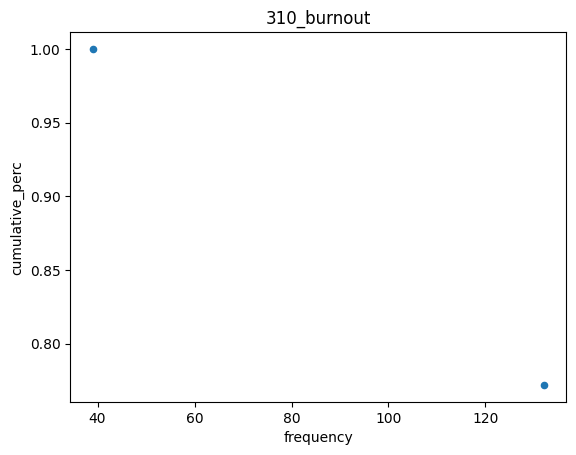

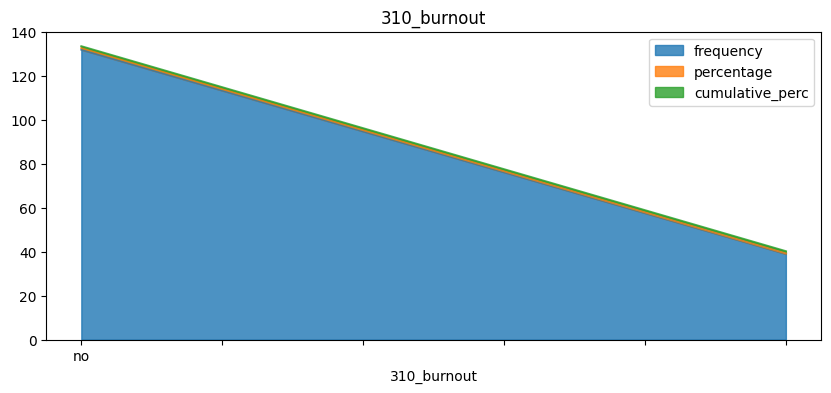

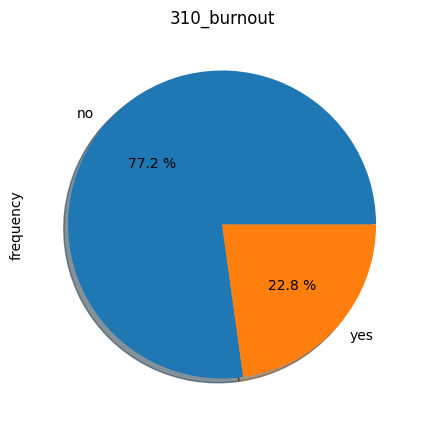





33_credit_to_customers


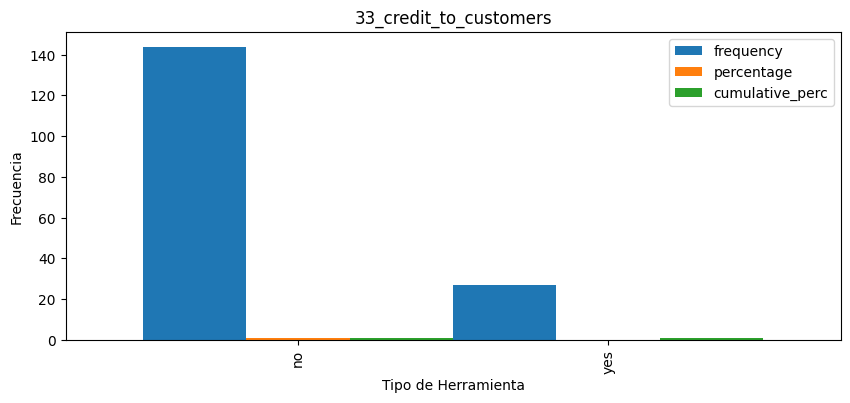

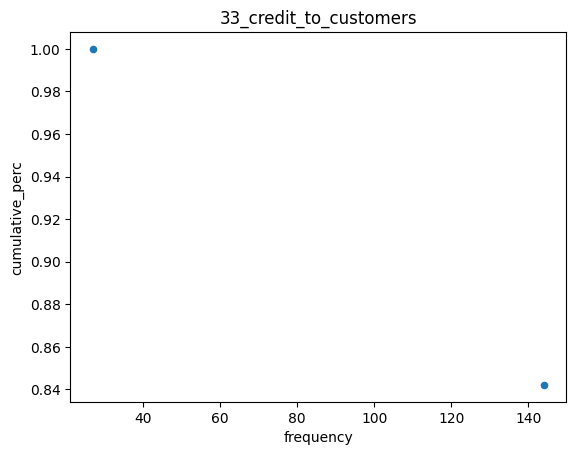

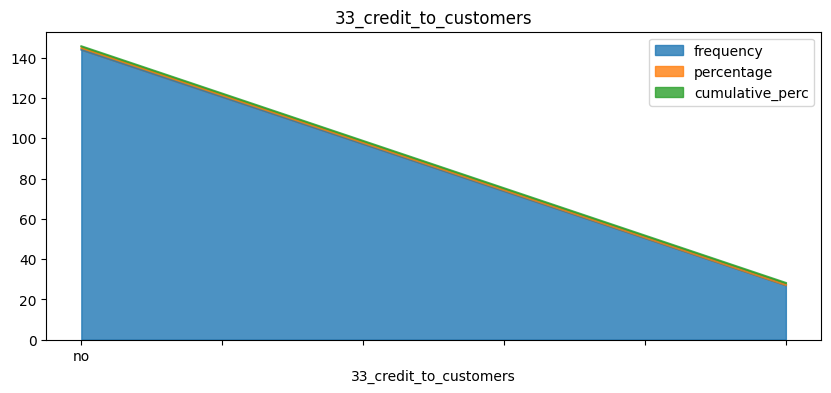

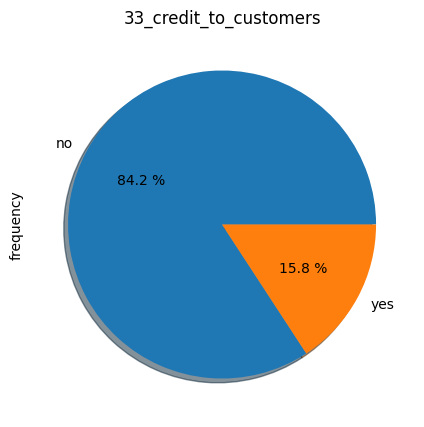





227_agreement_ecommerce_platforms


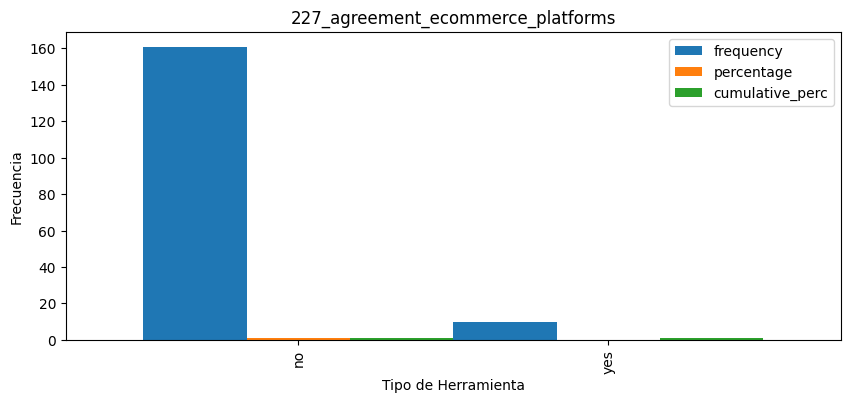

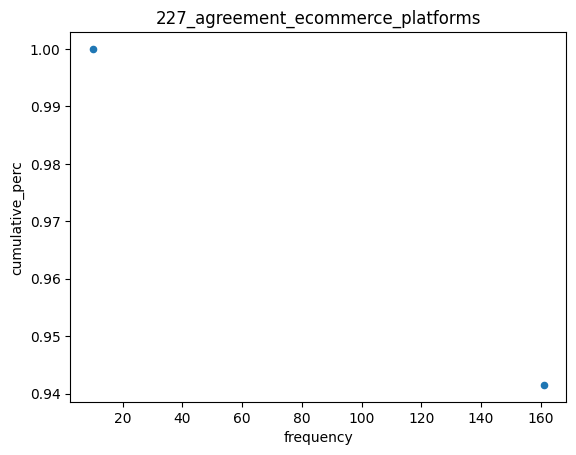

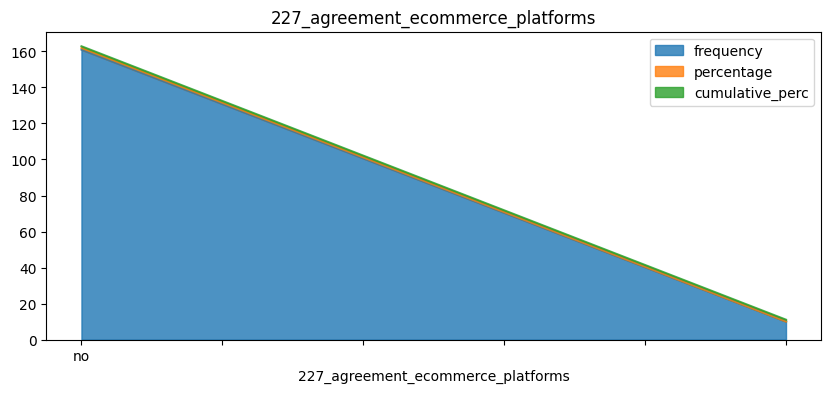

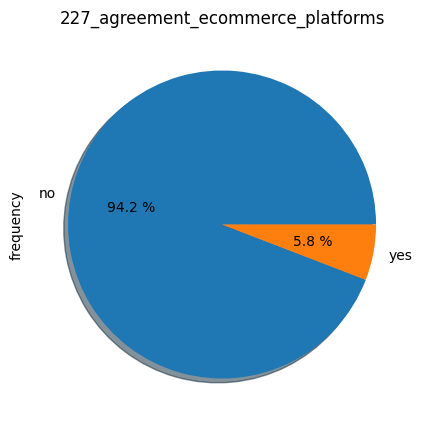





56_procurement_changes_pandemic


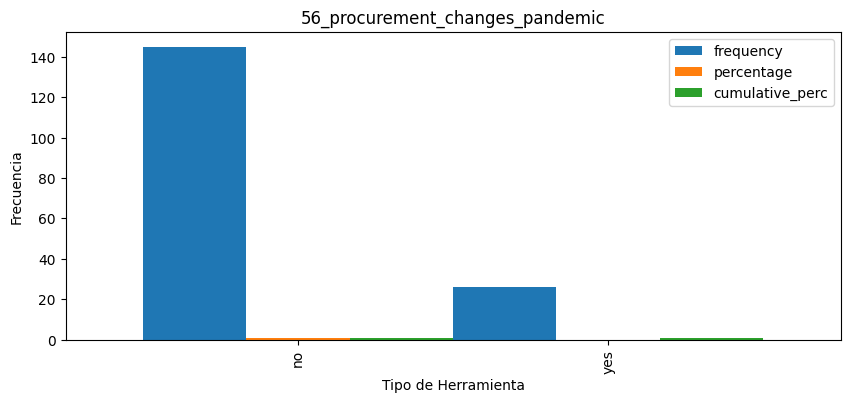

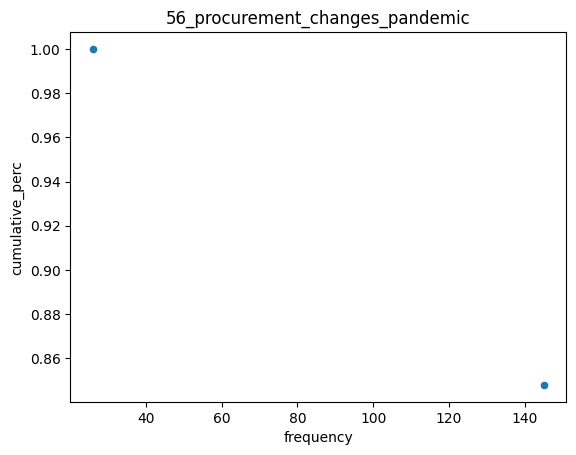

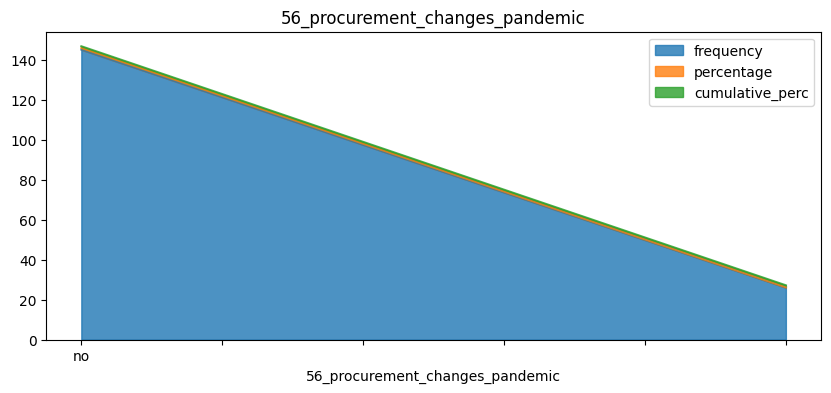

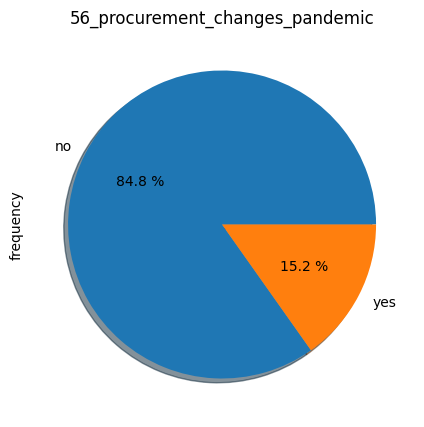





234_willingness_participate_workshop


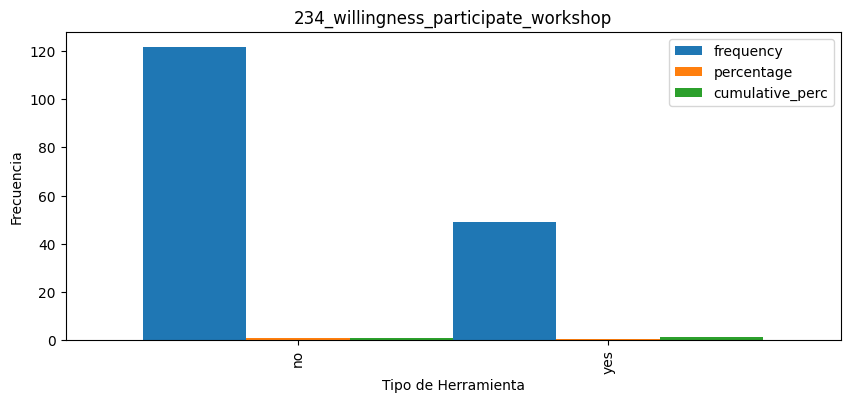

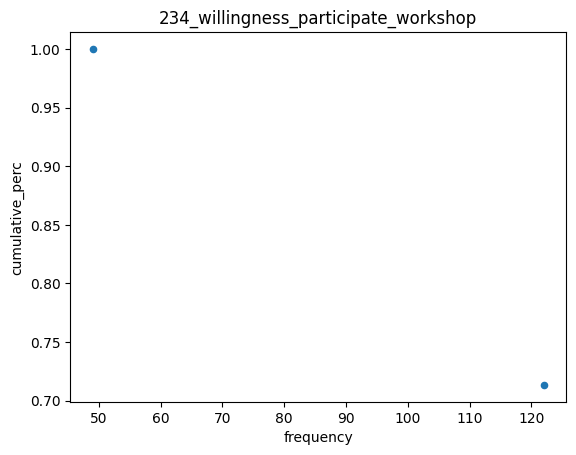

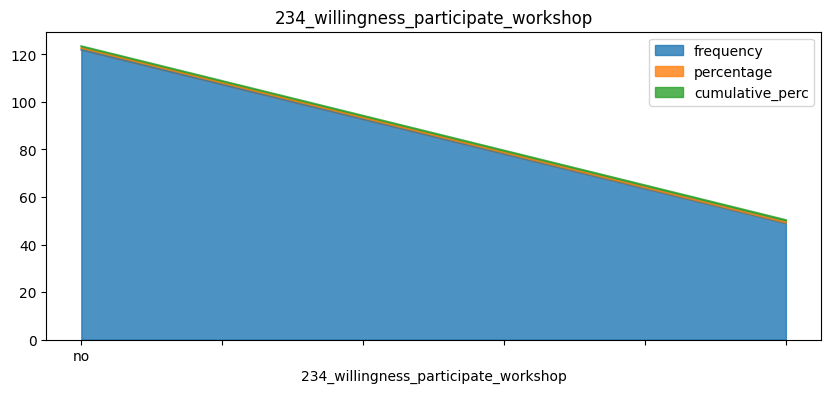

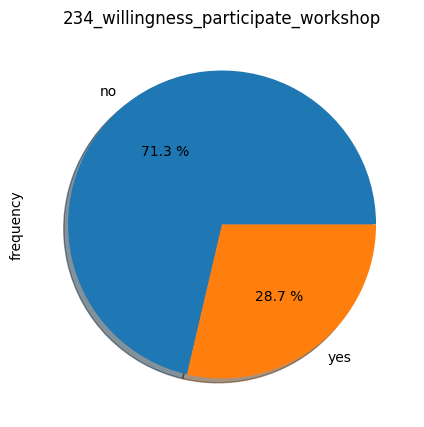





42_willingness_share_inventory_data_suppliers


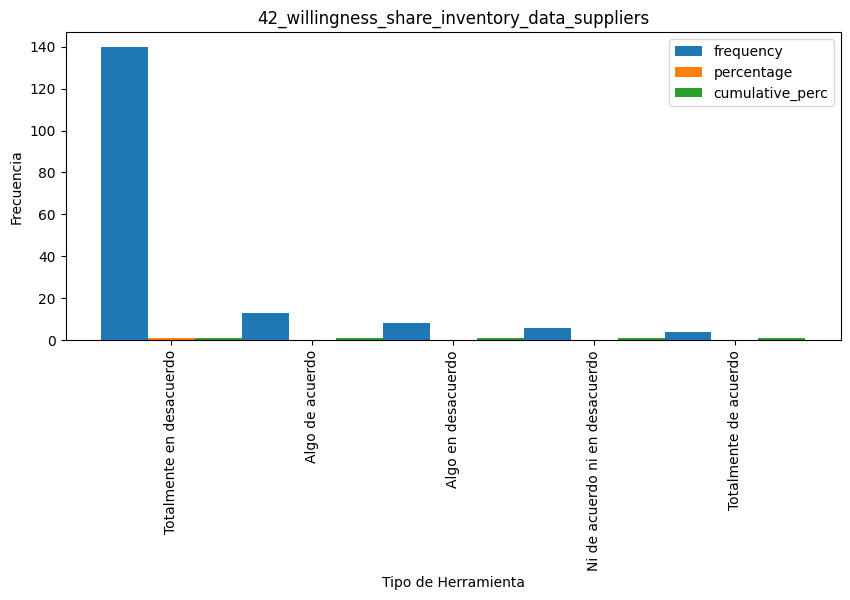

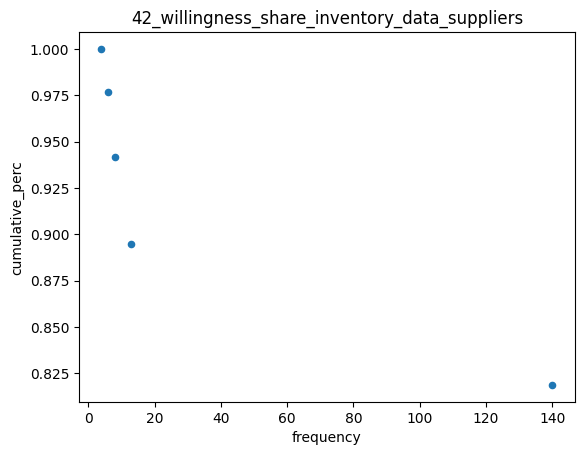

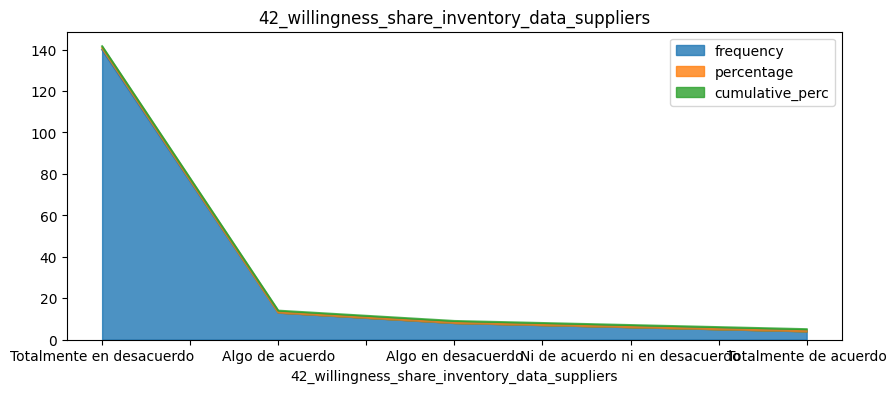

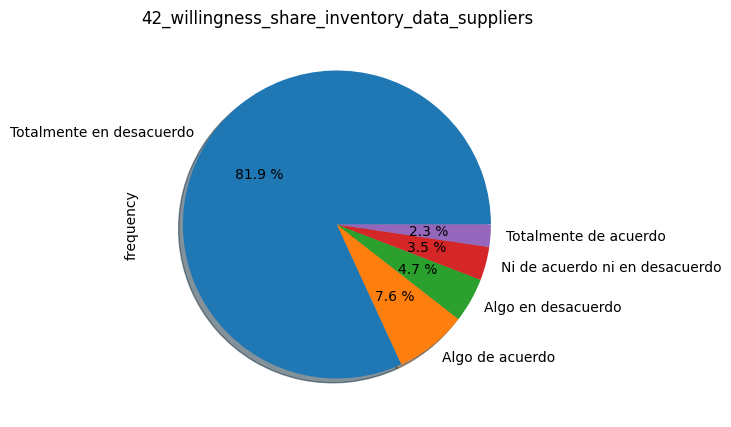





44_willingness_inventory_management_suppliers


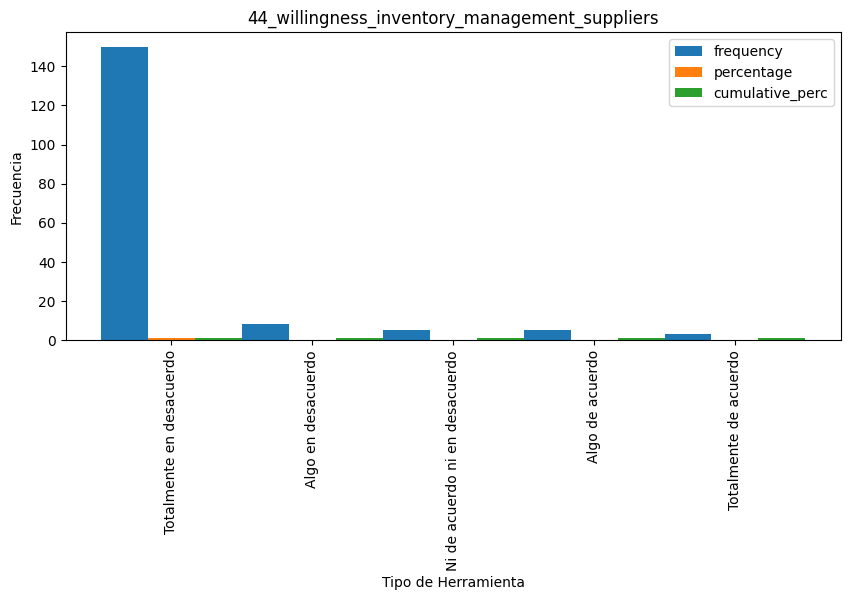

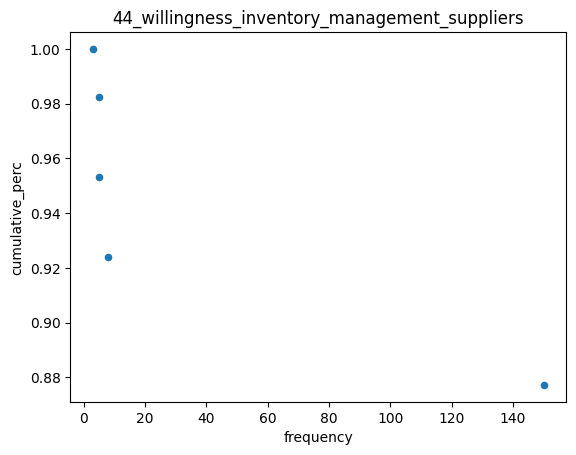

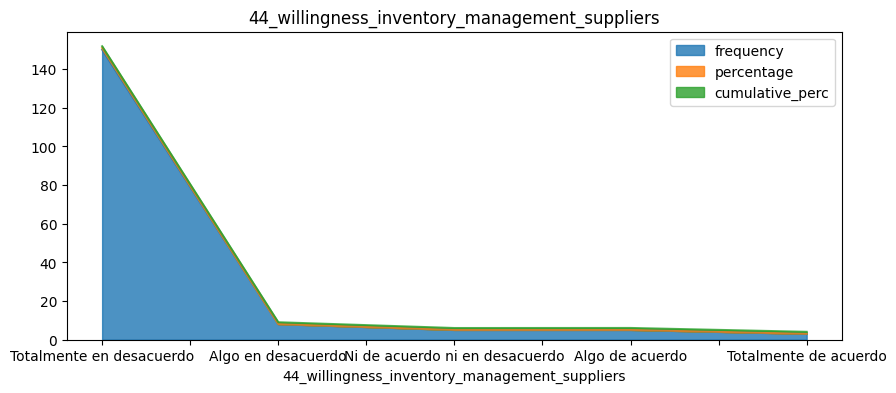

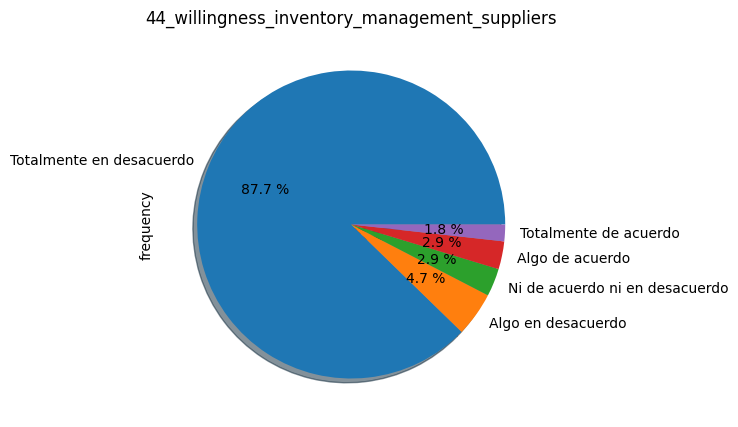





45_willingness_reorder_suppliers


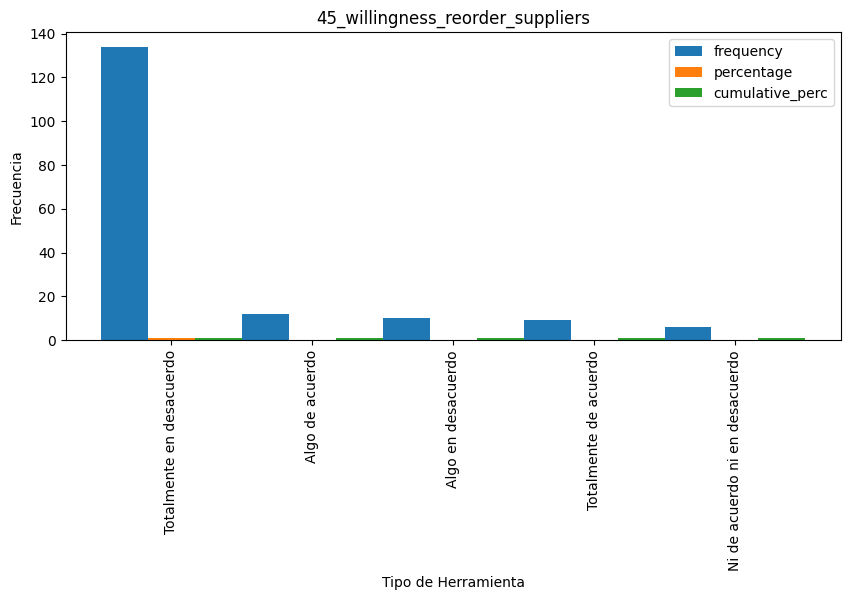

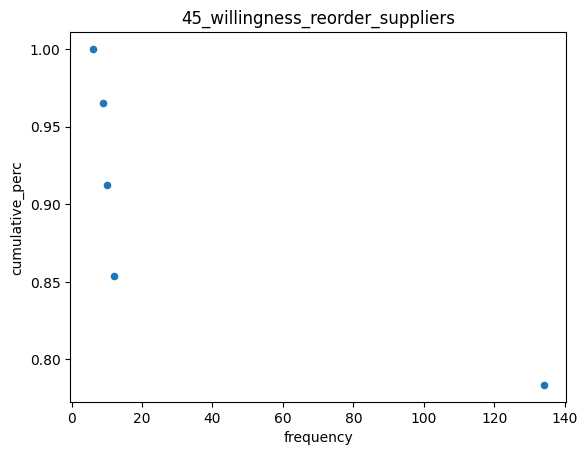

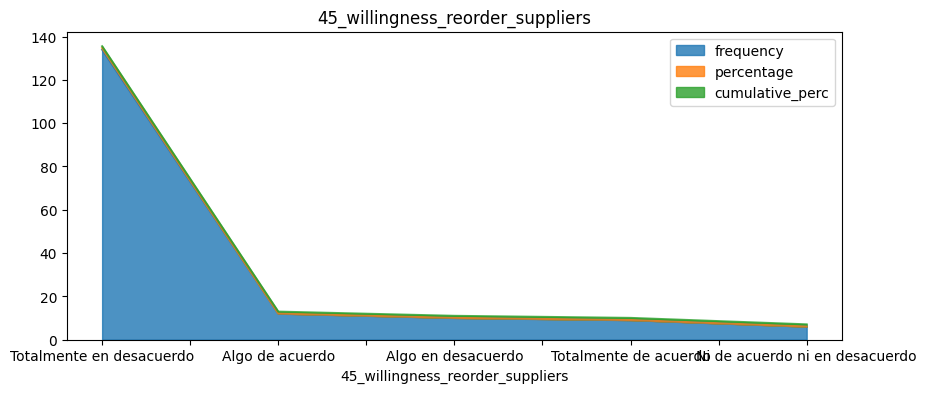

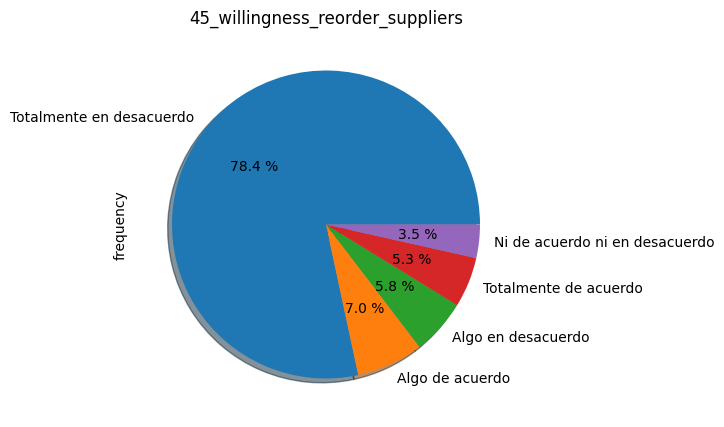





46_willingness_reorder_suppliers_variety


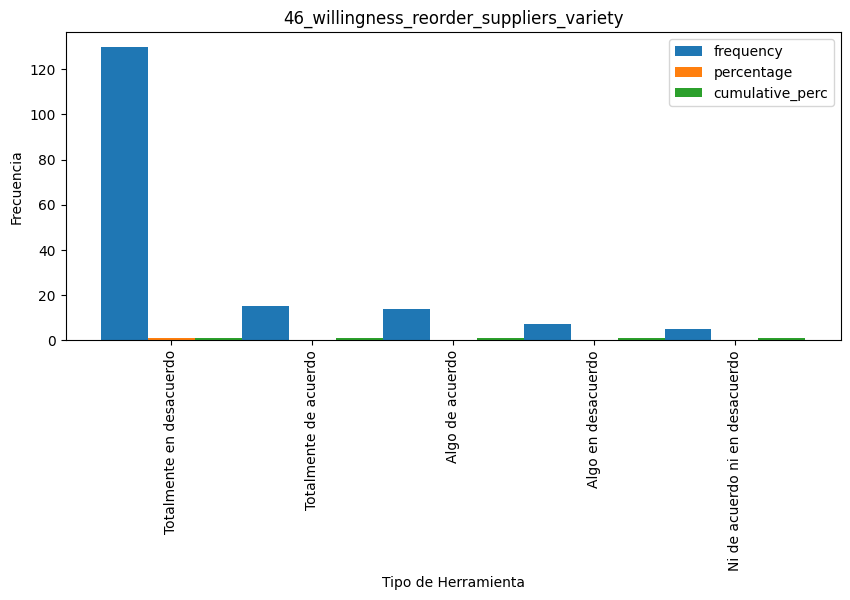

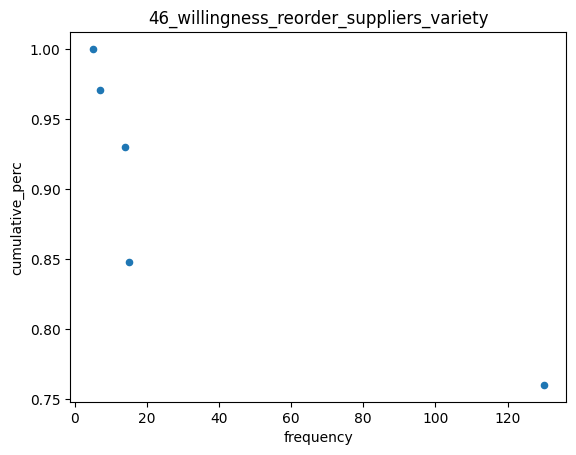

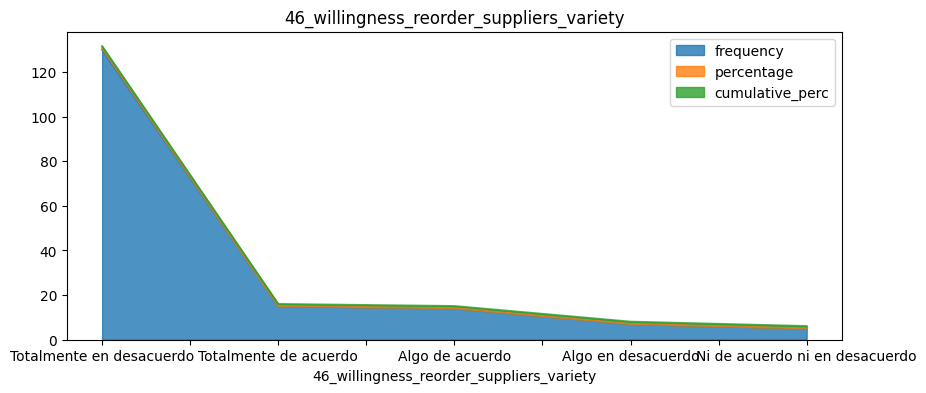

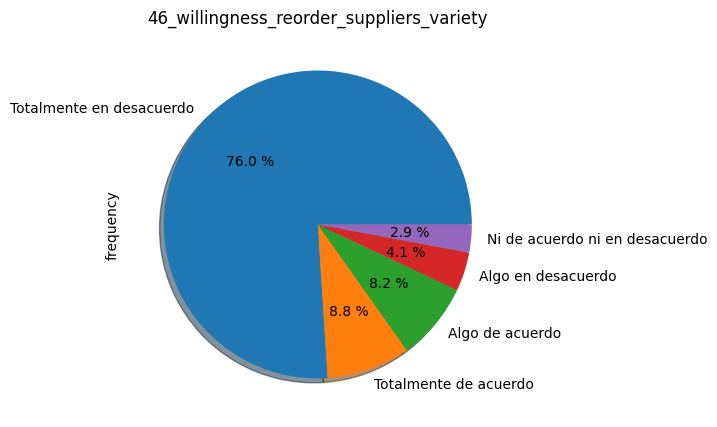





249_technology_training


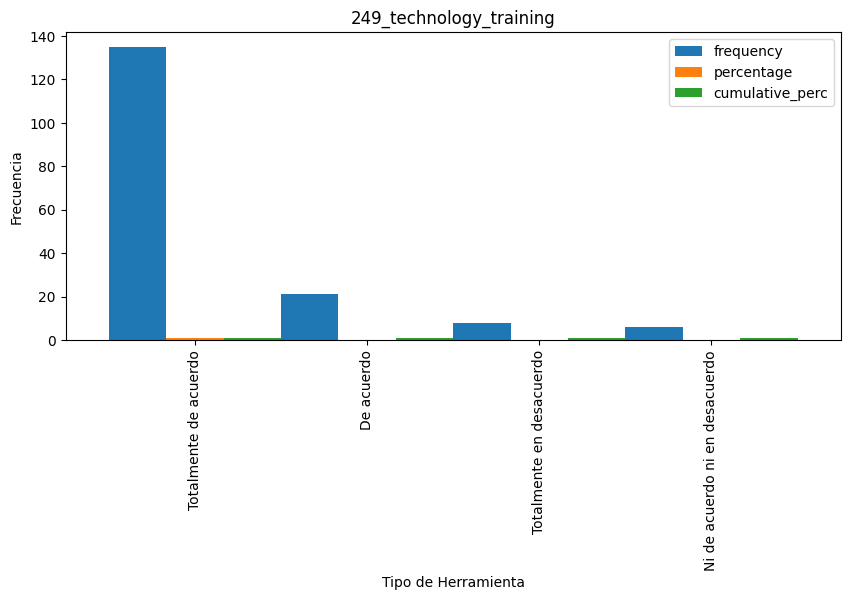

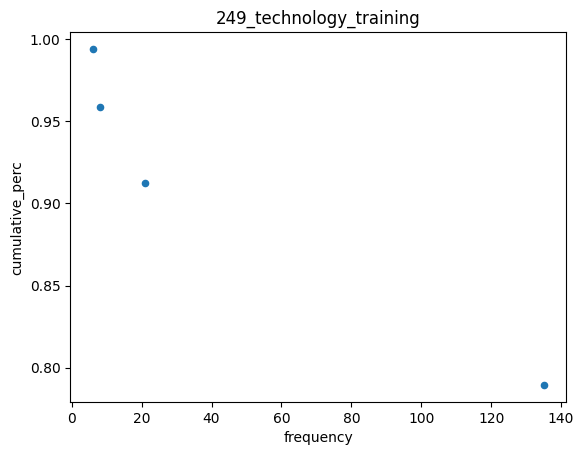

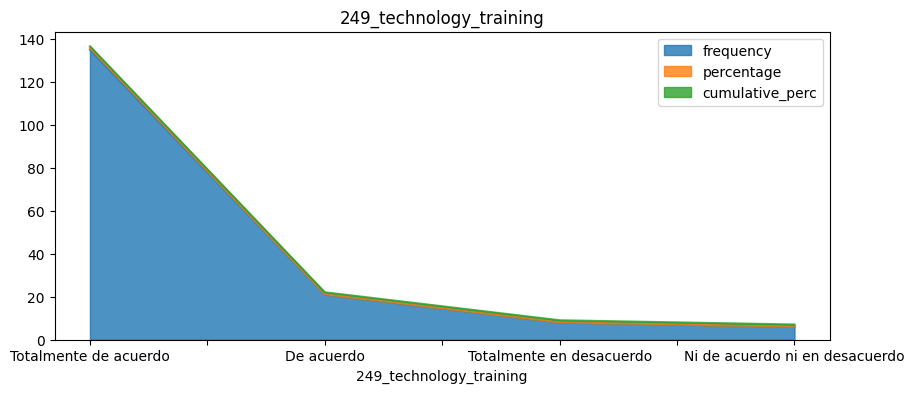

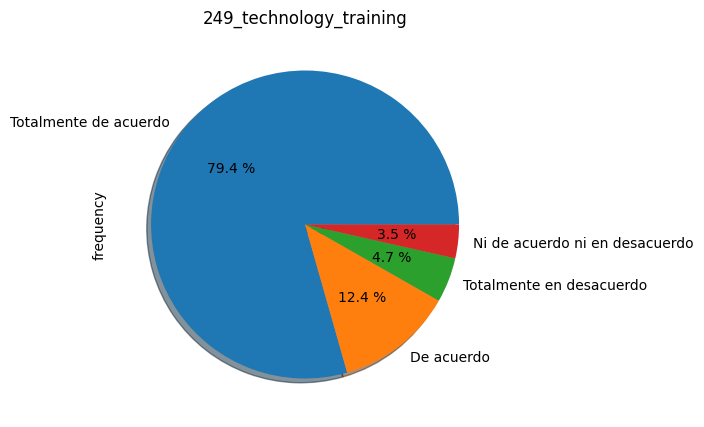





250_technology_investment_operations


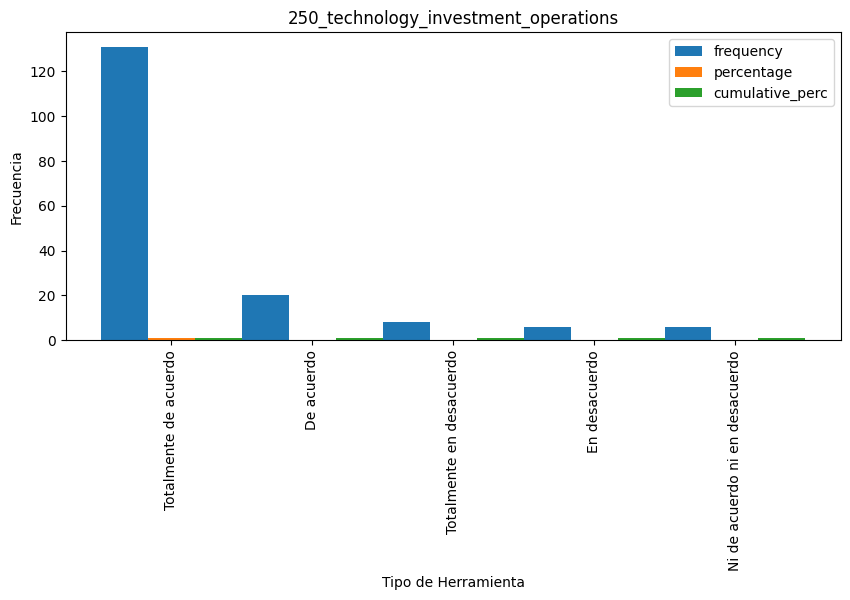

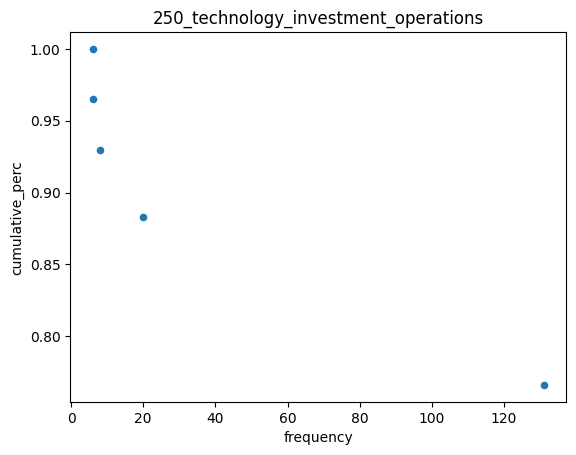

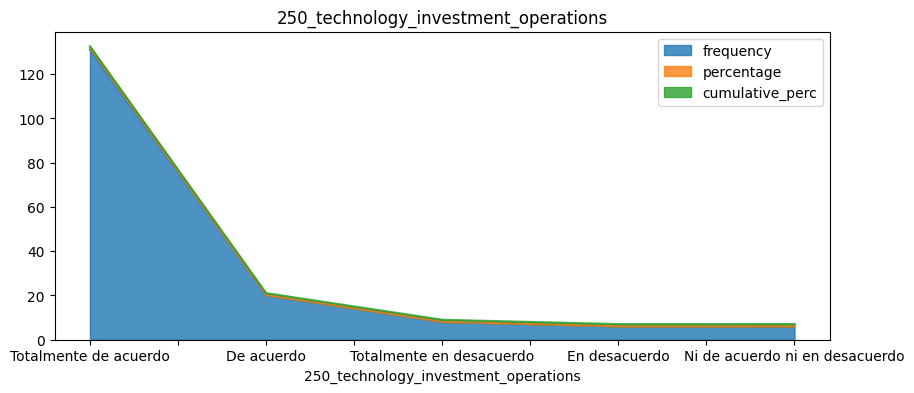

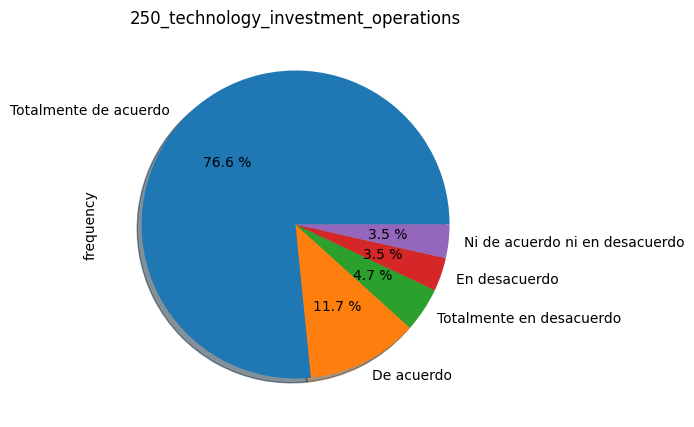





251_technology_investment_customers


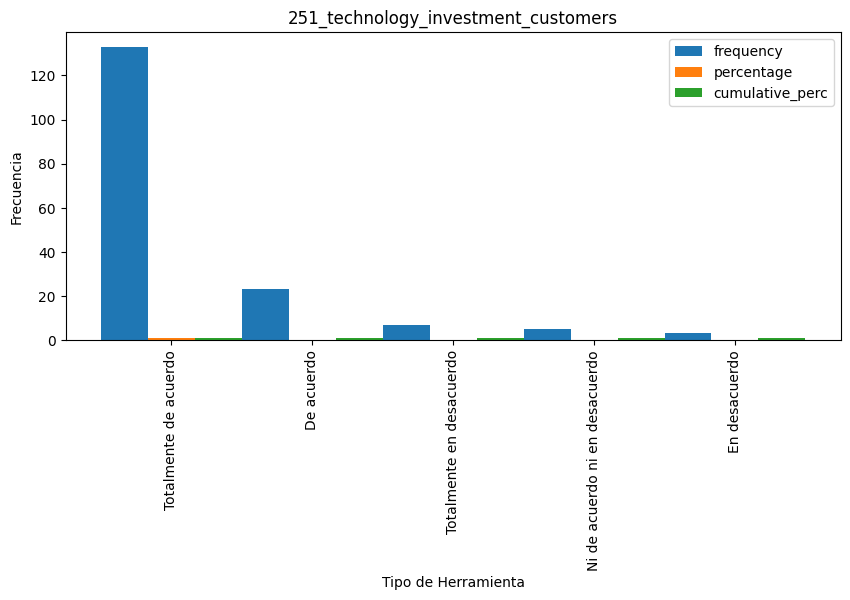

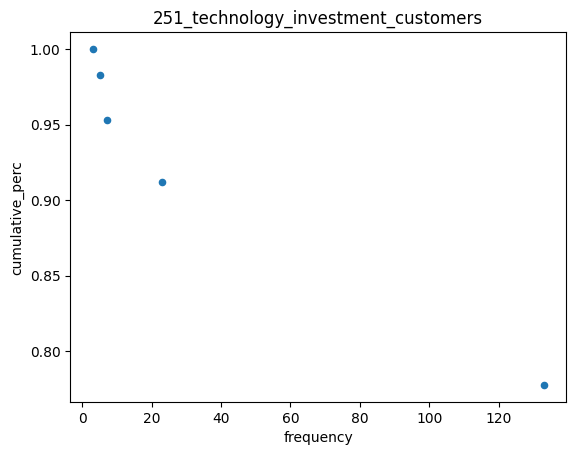

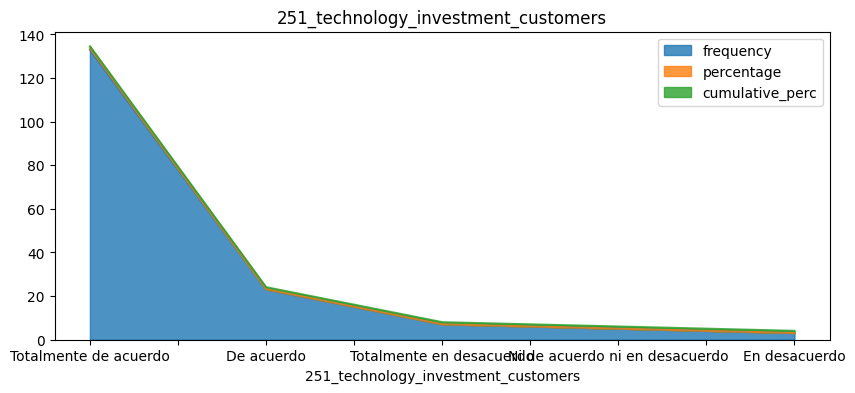

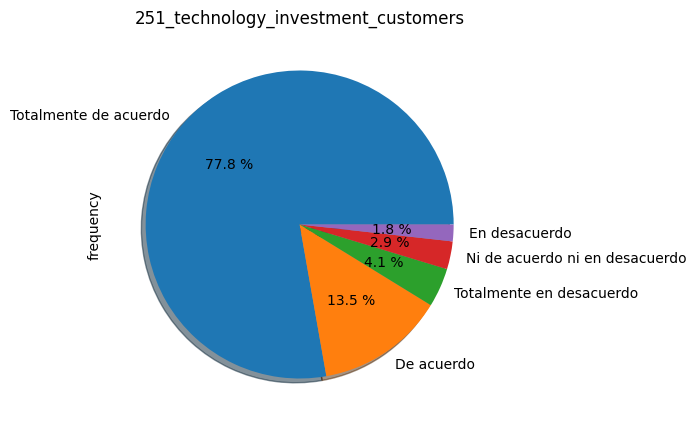





49_inventory_records


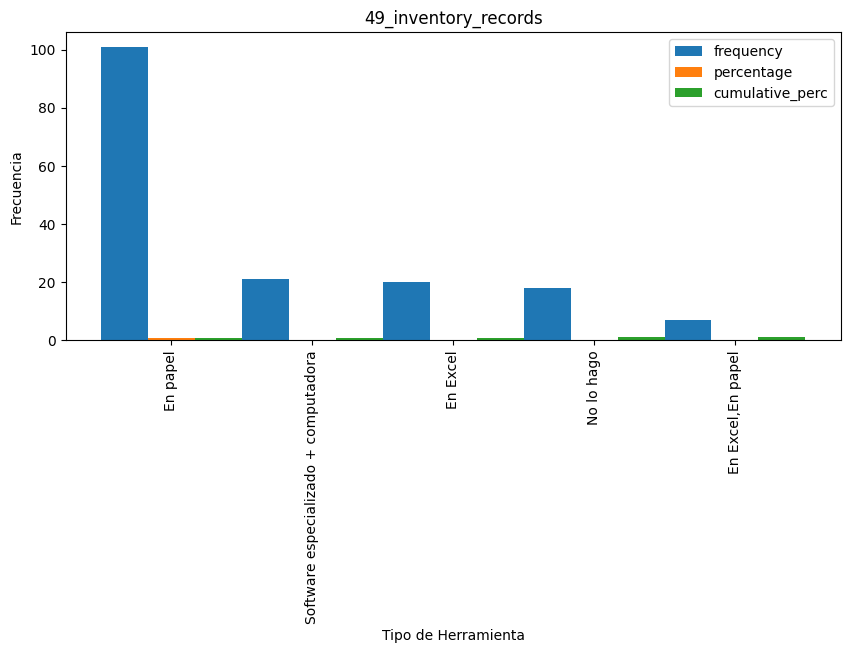

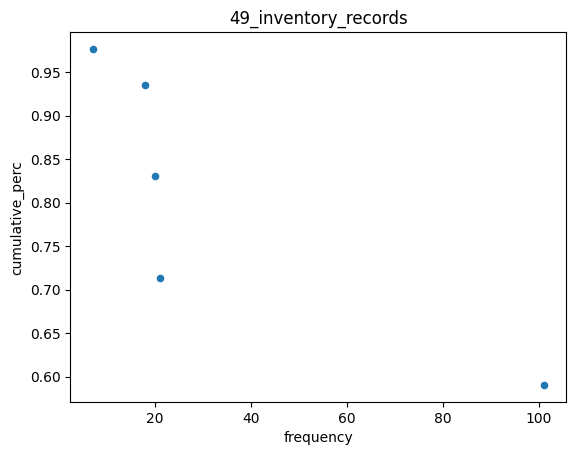

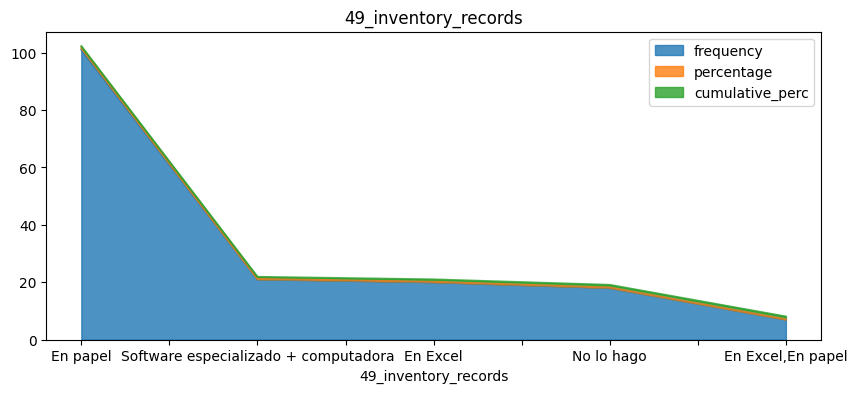

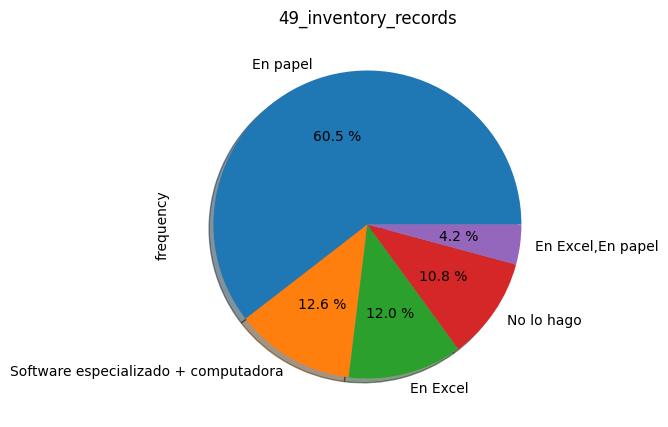





18_sales_records


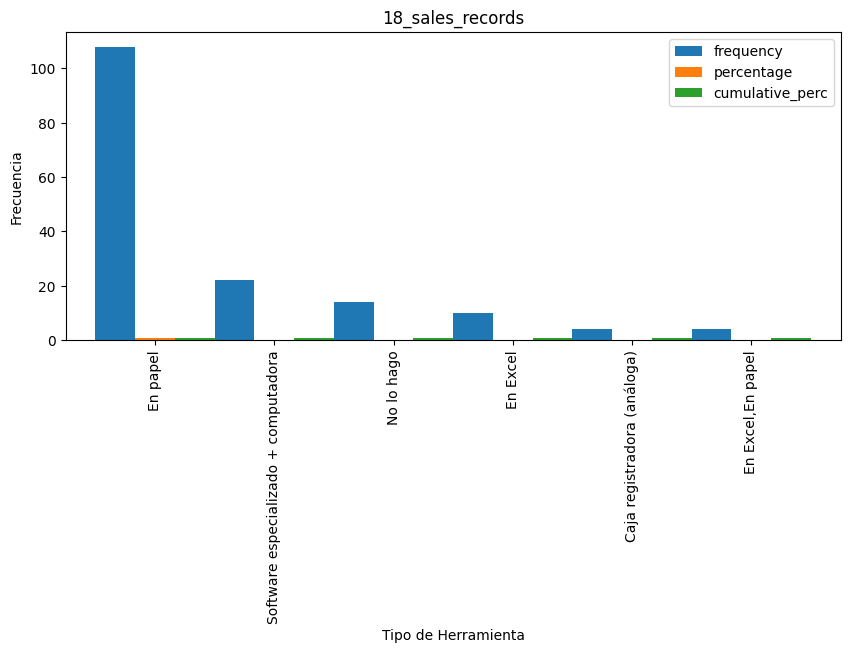

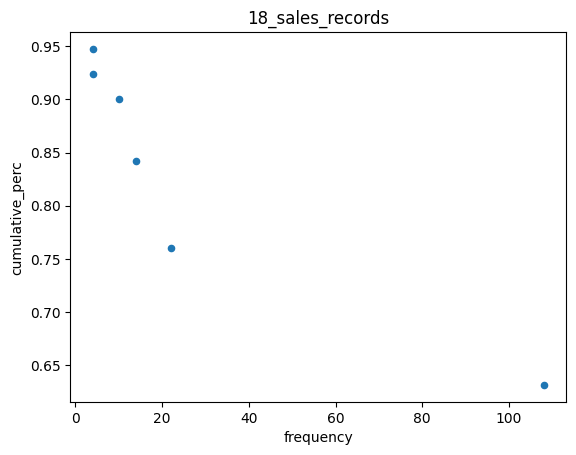

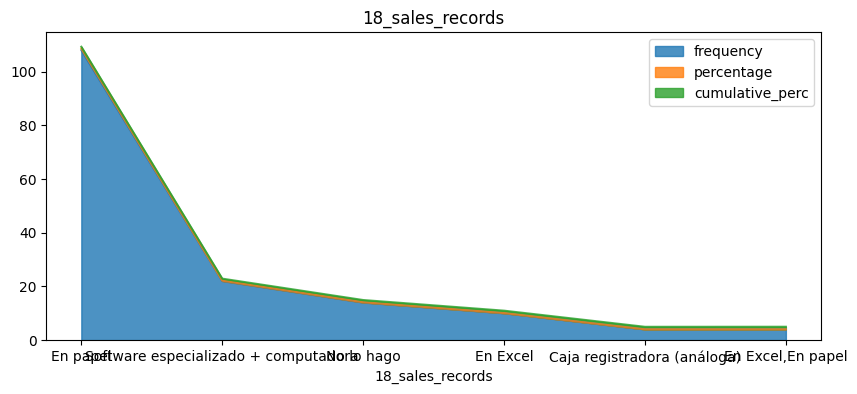

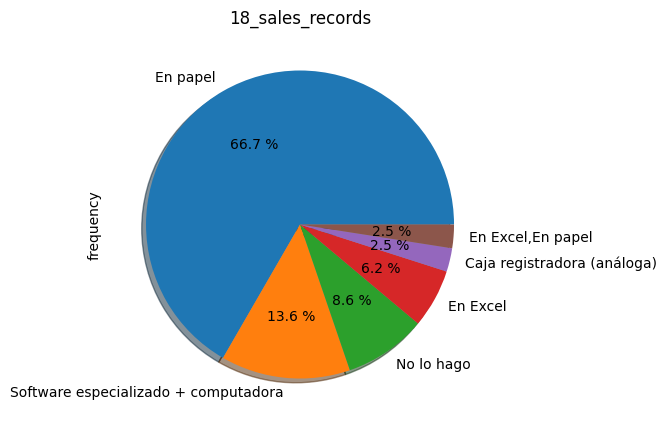





193_sales_planning_tools


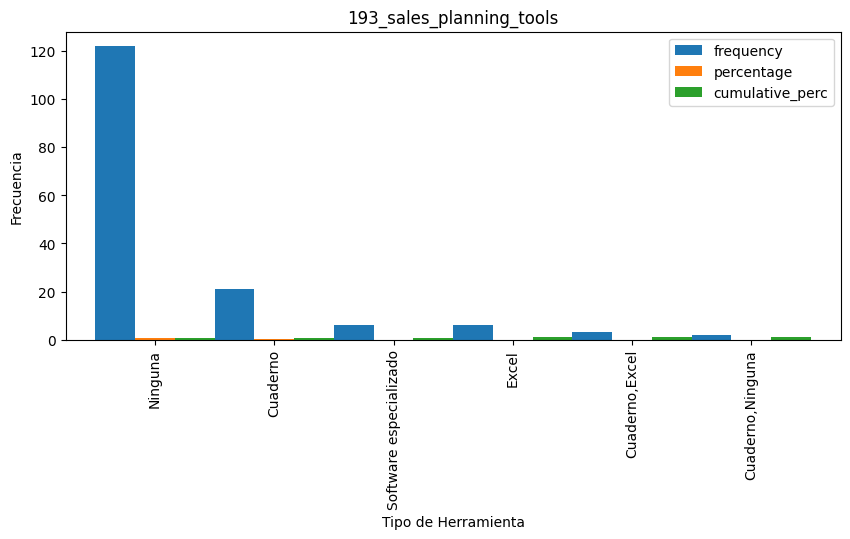

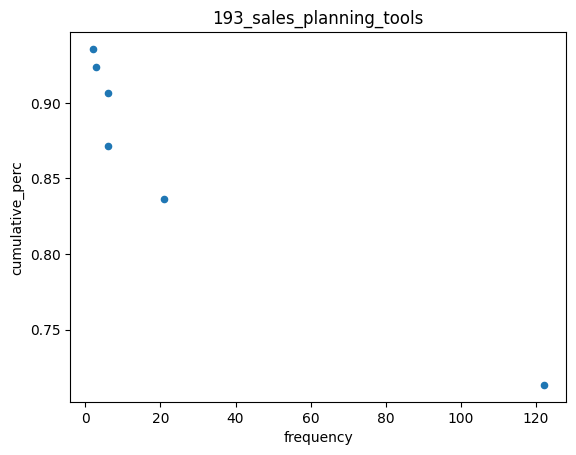

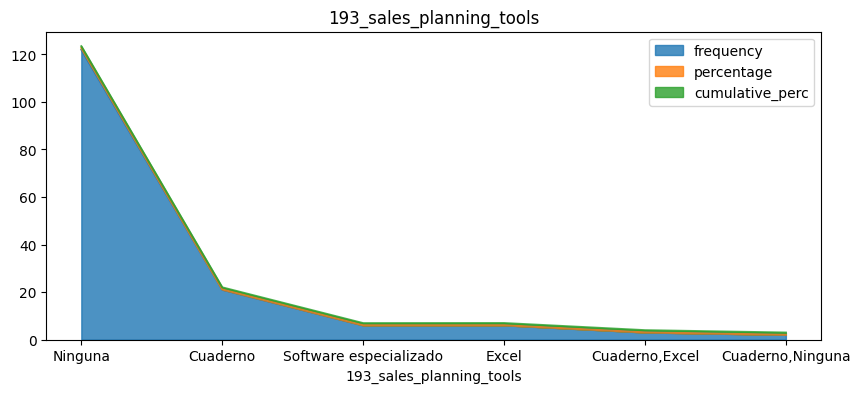

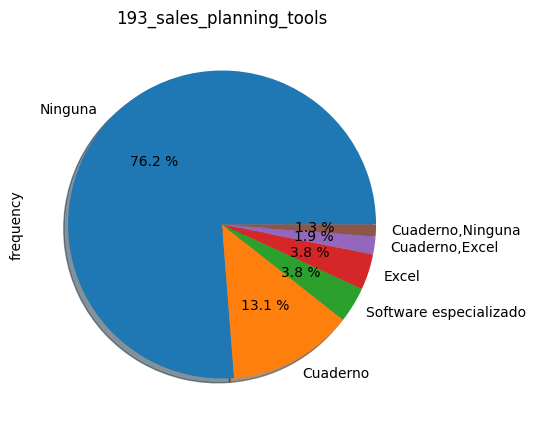

In [ ]:
#Ciclo for para generar gráficos de barra, dispersión, área y pastel
for i in range(1, 21):
    clave_Filtro_index = f'Filtro_index_{i}'
    df_grafica = resultados[clave_Filtro_index]
    titulo = df_grafica.index.name
    print(titulo)
    df_grafica.plot(kind='bar', width=1, figsize=(10, 4), title = titulo)
    plt.xlabel('Tipo de Herramienta')
    plt.ylabel('Frecuencia')
    plt.show()
    df_grafica.plot("frequency", "cumulative_perc", kind="scatter", title = titulo)
    plt.show()
    df_grafica.plot(kind='area', figsize=(10,4),alpha = 0.8, title = titulo)
    plt.show()
    df_grafica["frequency"].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%", title = titulo)
    plt.show()
    print("\n\n\n")